# Mining Information

In [1]:
# imports.py
from imports import *

# plotting magic
%matplotlib inline


# !!! Warning !!! 
# *** no more warnings ***
import warnings
warnings.filterwarnings("ignore")

# custom mods
import tidy

Import data frame from CSV

In [2]:
df = tidy.csv_btcusd()

cached csv


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Clean data

In [4]:
df = tidy.pre_cleaning(df)

Add return targets 

In [5]:
df = tidy.add_targets(df)

Verify dataframe imported correctly

In [6]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2807 entries, 2014-09-17 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2807 non-null   float64
 1   high                2807 non-null   float64
 2   low                 2807 non-null   float64
 3   close               2807 non-null   float64
 4   volume              2807 non-null   int64  
 5   fwd_log_ret         2807 non-null   float64
 6   fwd_ret             2807 non-null   float64
 7   fwd_pct_chg         2807 non-null   float64
 8   fwd_close_positive  2807 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 200.1 KB


Create a function for future use

In [140]:
def clean_df():
    df = tidy.csv_btcusd()
    df = tidy.pre_cleaning(df)
    df = tidy.add_targets(df)

    return df

Set up chart parameters

In [8]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

Set up plot

<AxesSubplot:xlabel='date'>

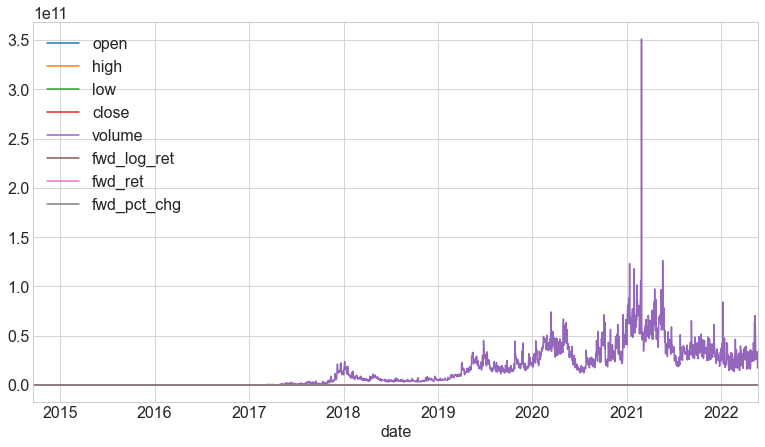

In [9]:
df.plot()

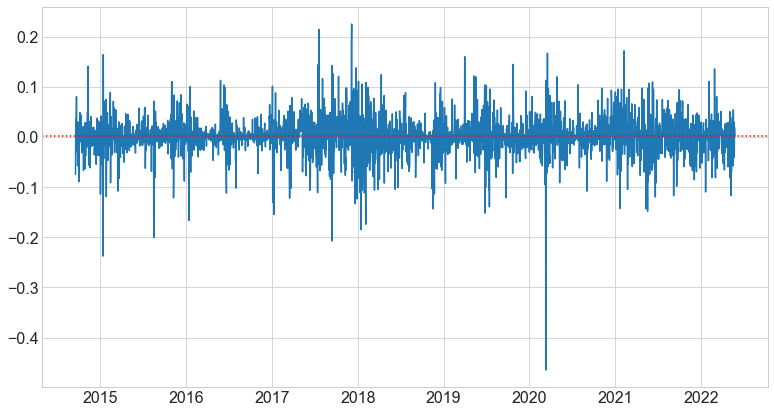

In [10]:
plt.plot(df.fwd_log_ret)
plt.axhline(df.fwd_log_ret.mean(), color='red', ls='dotted')

Resample 3 days to match miner CSV

In [11]:
df.resample('3D').mean()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,448.942332,450.956329,416.686005,425.523336,3.115323e+07,-0.037311,-16.143341,-0.035344,0.333333
2014-09-20 00:00:00+00:00,400.619334,414.212657,393.398000,403.292338,2.919043e+07,0.021227,8.962331,0.022447,0.666667
2014-09-23 00:00:00+00:00,420.333008,433.729665,408.932322,423.523326,3.418053e+07,-0.024899,-10.455332,-0.024578,0.000000
2014-09-26 00:00:00+00:00,404.818665,407.525991,390.571004,393.708659,2.003447e+07,-0.024765,-9.652659,-0.024196,0.000000
2014-09-29 00:00:00+00:00,380.147675,389.188996,375.487661,382.008667,3.114480e+07,-0.000351,-0.131673,-0.000102,0.333333
...,...,...,...,...,...,...,...,...,...
2022-05-11 00:00:00+00:00,29661.276042,30990.214844,27767.744792,29089.070313,6.007305e+10,0.013156,388.303385,0.013297,1.000000
2022-05-14 00:00:00+00:00,30229.534505,30935.445312,29160.845052,30423.098958,2.900971e+10,0.003575,108.197266,0.004258,0.666667
2022-05-17 00:00:00+00:00,29669.082031,30581.319661,28999.843099,29820.154297,3.138673e+10,-0.013700,-408.372396,-0.012430,0.333333


In [12]:
column_n = df.columns

Plot columns for exploration

OPEN


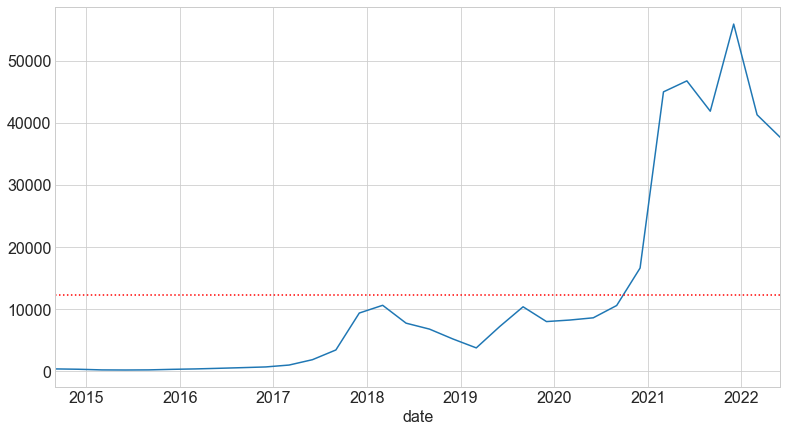

HIGH


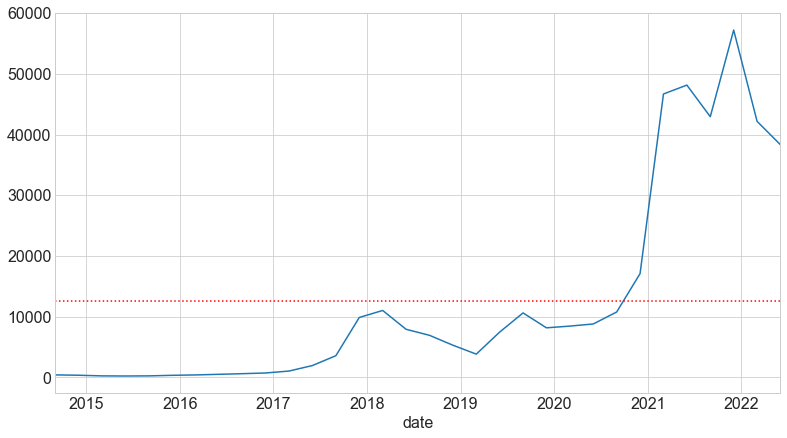

LOW


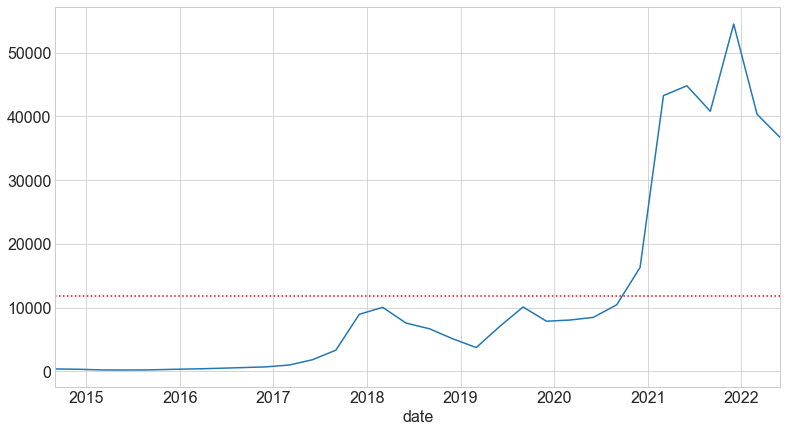

CLOSE


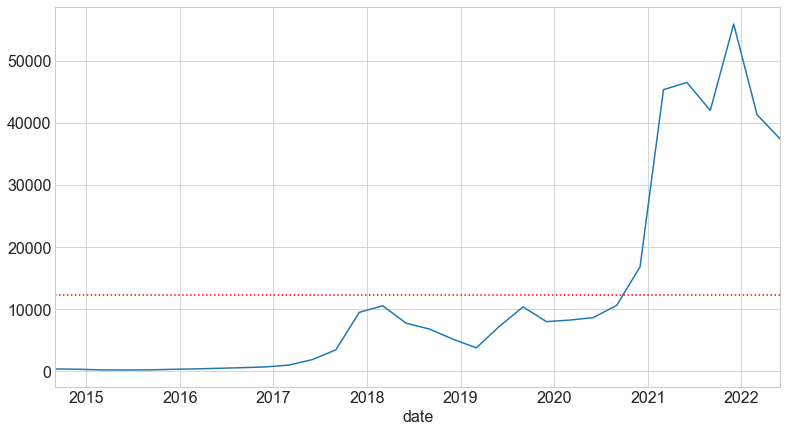

VOLUME


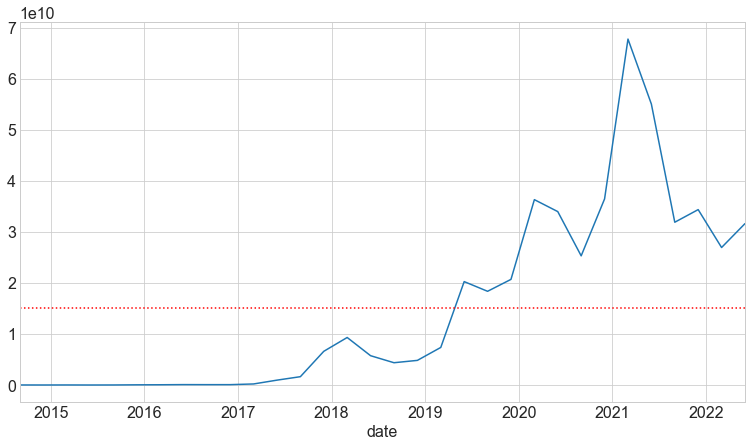

FWD_LOG_RET


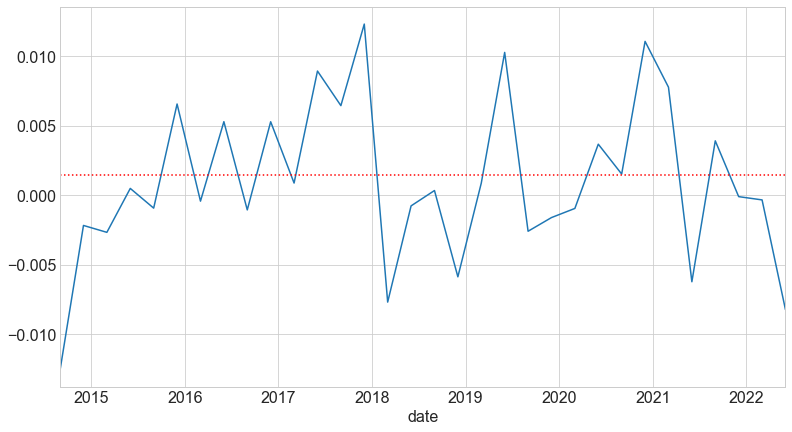

FWD_RET


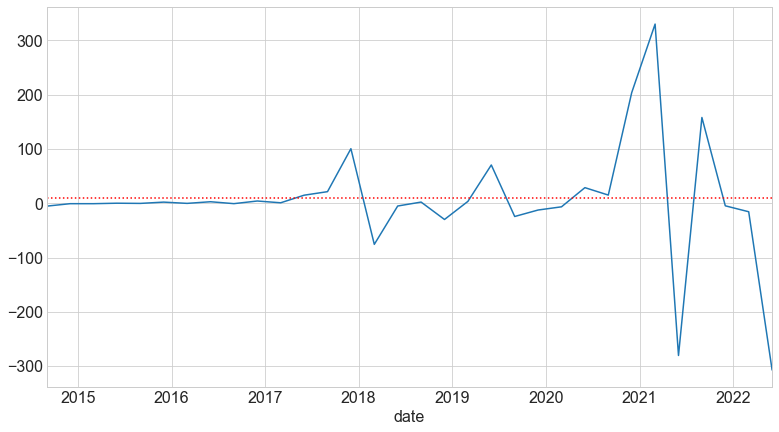

FWD_PCT_CHG


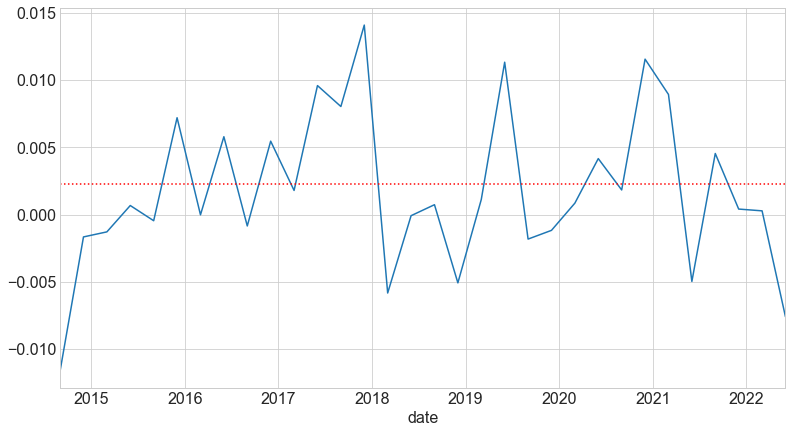

FWD_CLOSE_POSITIVE


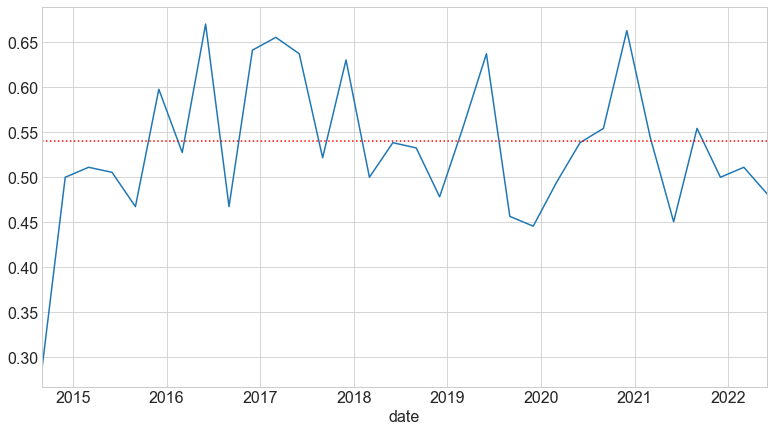

In [13]:
for col in column_n:
    print(col.upper())
    df[col].resample('3M').mean().plot()
    plt.axhline(df[col].mean(), color='red', ls='dotted')
    plt.show()
    

Plot the resample

<AxesSubplot:xlabel='date'>

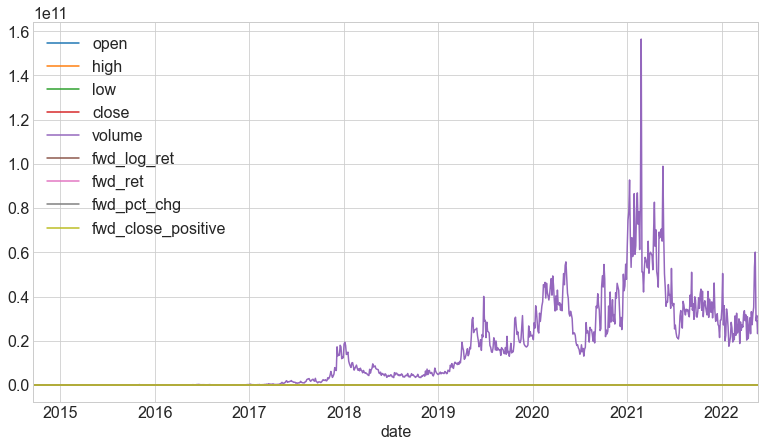

In [14]:
df.resample('3D').mean().plot()

<AxesSubplot:xlabel='date'>

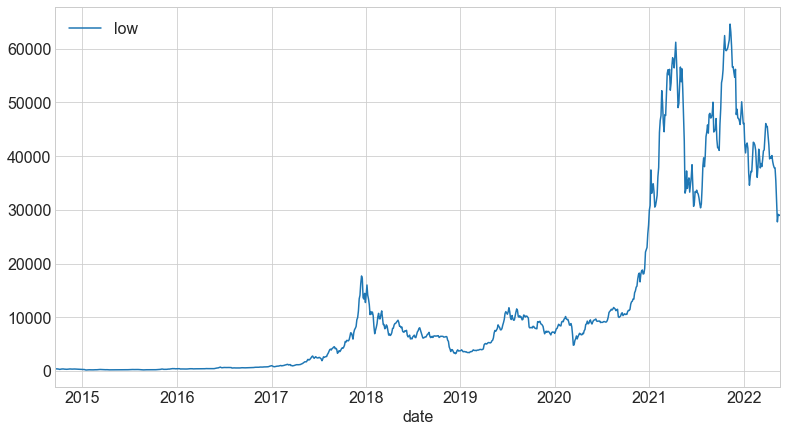

In [15]:
df[['low']].resample('3D').mean().plot()

Resample monthly

<AxesSubplot:xlabel='date'>

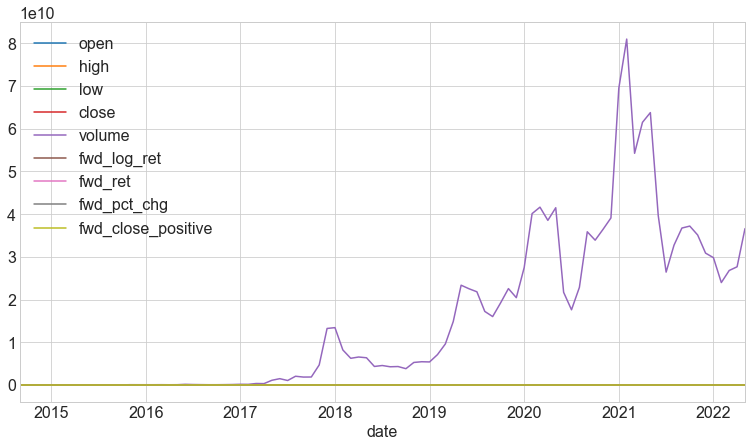

In [16]:
df.resample('M').mean().plot()

How many days did Bitcoin close positive?

In [19]:
df.fwd_close_positive.sum()

1517

Return every 3 dayus

<AxesSubplot:xlabel='date'>

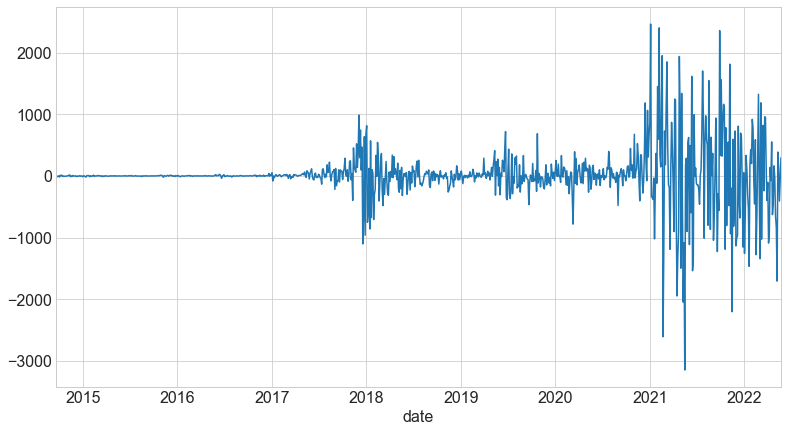

In [20]:
df['fwd_ret'].resample('3D').mean().plot()

Path to CSVS:

financial_forecaster/project_csvs/transaction-fees-to-miners.csv

### **cost_pertrans :** the miners revenue divided by the number of transactions.

In [21]:
cost_pertrans = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/cost-per-transaction.csv')
cost_pertrans.Timestamp = pd.to_datetime(cost_pertrans.Timestamp).dt.date
cost_pertrans = cost_pertrans.set_index('Timestamp').sort_index()
cost_pertrans.head()

,cost-per-transaction
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **cost_pertrans_percent :** miners revenue as percentage of the transaction volume.

In [22]:
cost_pertrans_percent = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/cost-per-transaction-percent.csv')
cost_pertrans_percent.Timestamp = pd.to_datetime(cost_pertrans_percent.Timestamp).dt.date
cost_pertrans_percent = cost_pertrans_percent.set_index('Timestamp').sort_index()
cost_pertrans_percent.head()


,cost-per-transaction-percent
Timestamp,
2010-08-28,69.031160
2010-08-31,26.529699
2010-09-03,33.303030
2010-09-06,28.676139
2010-09-09,40.140295


### **fees_pertransaction :** Average transaction fees in USD per transaction.

In [23]:
fees_pertransaction = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/avg-fees-per-transaction.csv')
fees_pertransaction.Timestamp = pd.to_datetime(fees_pertransaction.Timestamp).dt.date
fees_pertransaction = fees_pertransaction.set_index('Timestamp').sort_index()
fees_pertransaction.head()

,fees-usd-per-transaction
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **fees_tominers :** The total USD value of all transaction fees paid to miners. 
*Note: Does not include coinbase block rewards.*

In [24]:
fees_tominers = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/transaction-fees-to-miners.csv')
fees_tominers.Timestamp = pd.to_datetime(fees_tominers.Timestamp).dt.date
fees_tominers = fees_tominers.set_index('Timestamp').sort_index()
fees_tominers.head()

,transaction-fees-usd
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **miners_revenue :** Total value in USD of coinbase block rewards and transaction fees paid to miners.


In [25]:
miners_revenue = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/miners-revenue.csv')
miners_revenue.Timestamp = pd.to_datetime(miners_revenue.Timestamp).dt.date
miners_revenue = miners_revenue.set_index('Timestamp').sort_index()
miners_revenue.head()

,miners-revenue
Timestamp,
2009-01-16,0.0
2009-01-19,0.0
2009-01-22,0.0
2009-01-25,0.0
2009-01-28,0.0


### **difficulty:** A relative measure of how difficult it is to mine a new block for the blockchain

In [26]:
difficulty = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/difficulty.csv')
difficulty.Timestamp = pd.to_datetime(difficulty.Timestamp).dt.date
difficulty = difficulty.set_index('Timestamp').sort_index()
difficulty.head()

,difficulty
Timestamp,
2009-01-02,1.0
2009-01-05,0.0
2009-01-08,1.0
2009-01-11,1.0
2009-01-14,1.0


### **total_hash_rate:** The estimated number of terahashes per second the bitcoin network is performing in the last 24 hours.

In [27]:
total_hash_rate = pd.read_csv('~/codeup-data-science/financial_forecaster/project_csvs/hash-rate.csv')
total_hash_rate.Timestamp = pd.to_datetime(total_hash_rate.Timestamp).dt.date
total_hash_rate = total_hash_rate.set_index('Timestamp').sort_index()
total_hash_rate.head()

,hash-rate
Timestamp,
2009-01-02,4.971027e-08
2009-01-05,0.000000e+00
2009-01-08,6.959438e-07
2009-01-11,4.424214e-06
2009-01-14,6.313204e-06


ADD All the miner data to the main Dataframe

In [28]:
df.index = df.index.date
df['cost_pertransaction'] = cost_pertrans
df['cost_pertransaction_percent'] = cost_pertrans_percent
df['fees_pertransaction'] = fees_pertransaction
df['fees_tominers'] = fees_tominers
df['miners_revenue'] = miners_revenue
df['relative_difficulty'] = difficulty
df['total_hash_rate'] = total_hash_rate

In [29]:
df

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cost_pertransaction,cost_pertransaction_percent,fees_pertransaction,fees_tominers,miners_revenue,relative_difficulty,total_hash_rate
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,NaN,4.231596,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,29.138967,NaN,0.072554,6033.262208,2.423051e+06,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,NaN,NaN,NaN,NaN,NaN,2.982973e+10,2.402207e+05
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,NaN,3.069054,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,29.910568,NaN,0.064216,4207.641303,1.959830e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,NaN,0.494886,NaN,NaN,NaN,NaN,NaN
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,112.755347,NaN,1.567418,354255.305563,2.548406e+07,NaN,NaN
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,NaN,NaN,NaN,NaN,NaN,3.125110e+13,1.895271e+08
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,NaN,0.620023,NaN,NaN,NaN,NaN,NaN


In [30]:
df.index = pd.to_datetime(df.index)

Front fill all the missing values, as CSVs have 3 day average

In [31]:
df.fillna(method='ffill', inplace=True)

In [32]:
df

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cost_pertransaction,cost_pertransaction_percent,fees_pertransaction,fees_tominers,miners_revenue,relative_difficulty,total_hash_rate
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,NaN,4.231596,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,29.138967,4.231596,0.072554,6033.262208,2.423051e+06,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,29.138967,4.231596,0.072554,6033.262208,2.423051e+06,2.982973e+10,2.402207e+05
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,29.138967,3.069054,0.072554,6033.262208,2.423051e+06,2.982973e+10,2.402207e+05
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,29.910568,3.069054,0.064216,4207.641303,1.959830e+06,2.982973e+10,2.402207e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,96.257967,0.494886,1.857998,488480.736741,2.530689e+07,3.125110e+13,1.895271e+08
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,112.755347,0.494886,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,112.755347,0.494886,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,112.755347,0.620023,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08


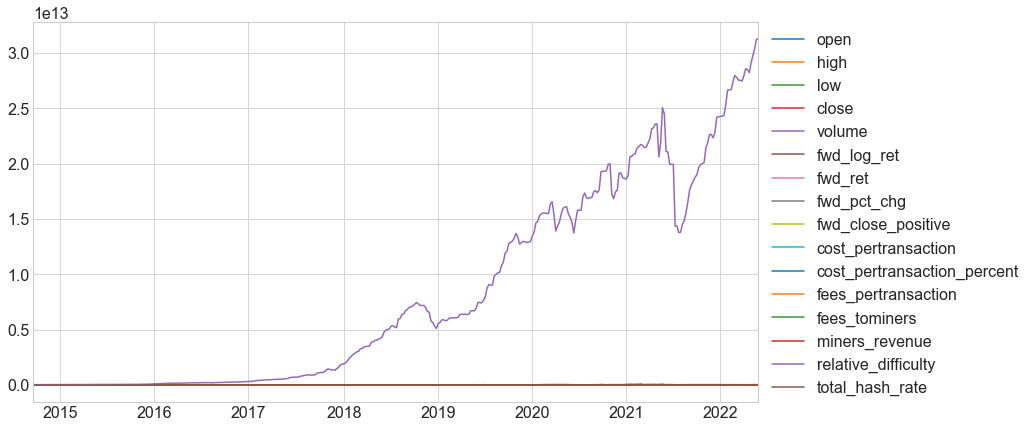

In [33]:
df.resample('W').mean().plot()
plt.legend(loc=(1.01,0))

OPEN


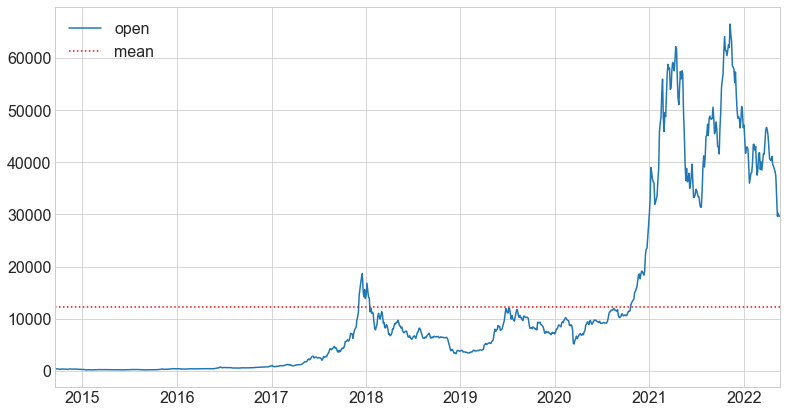

HIGH


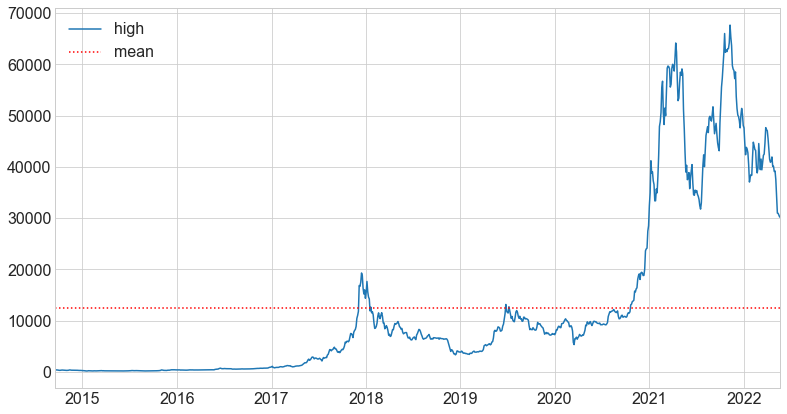

LOW


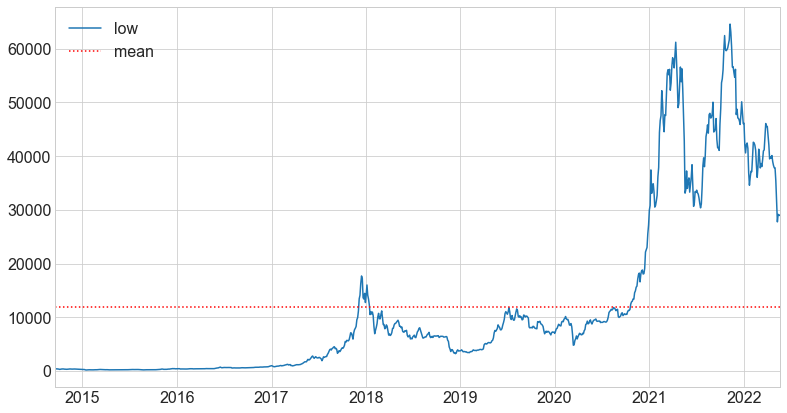

CLOSE


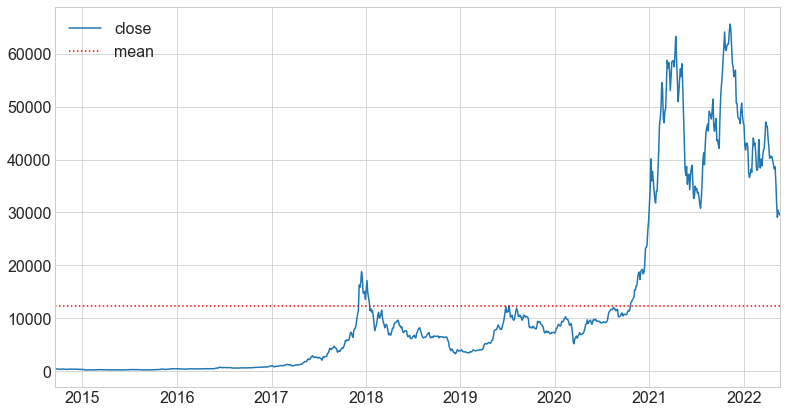

VOLUME


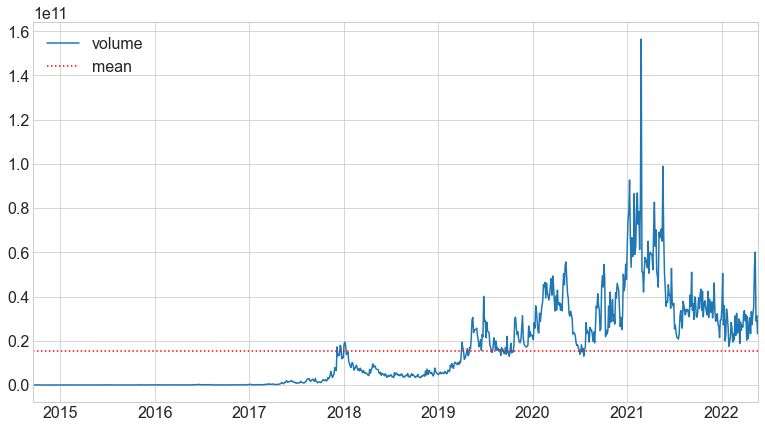

FWD_LOG_RET


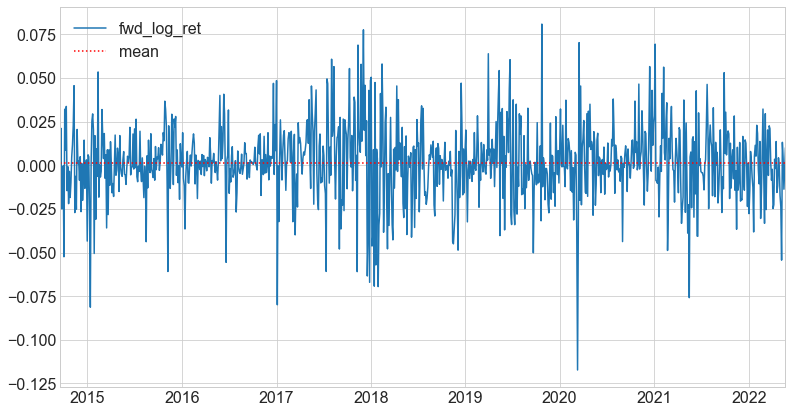

FWD_RET


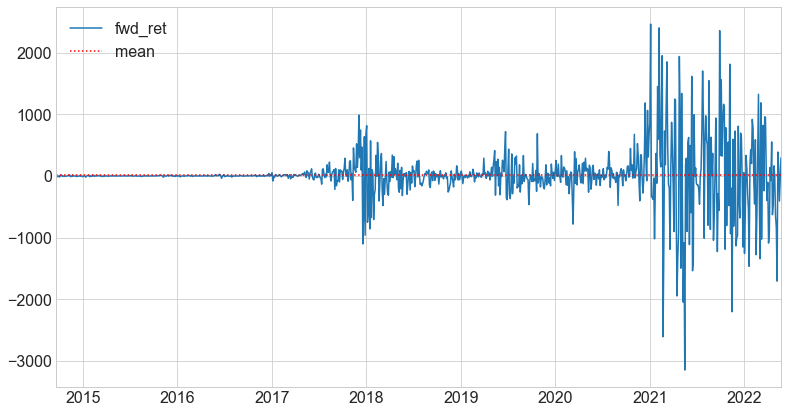

FWD_PCT_CHG


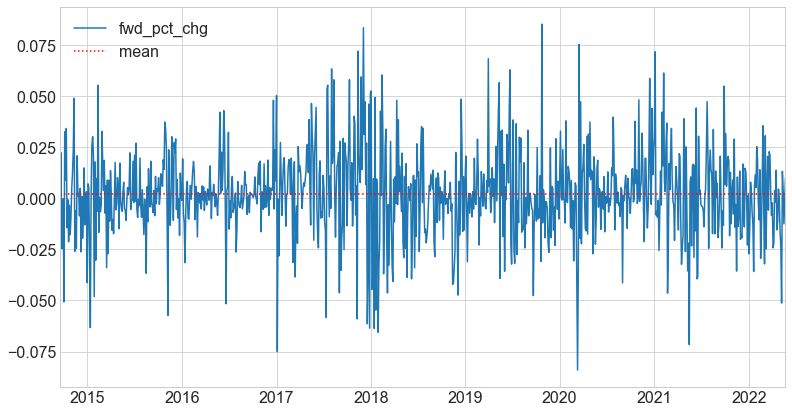

FWD_CLOSE_POSITIVE


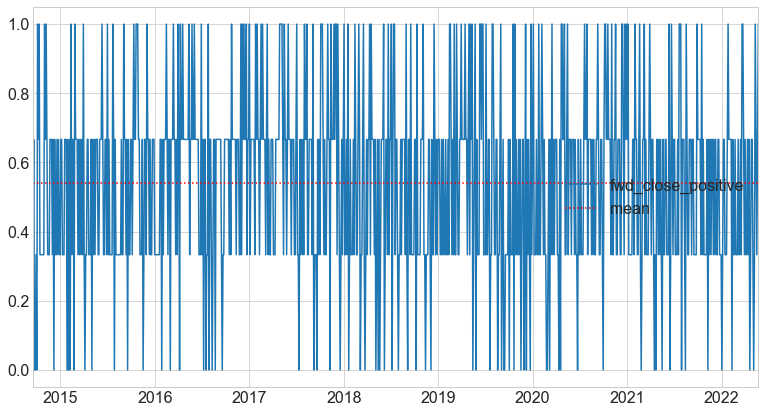

COST_PERTRANSACTION


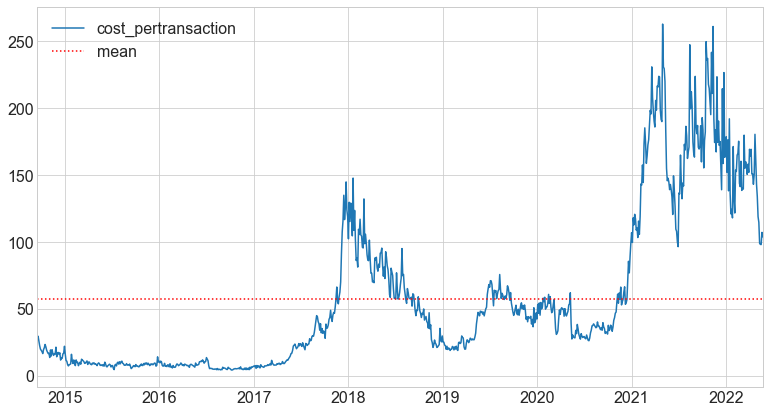

COST_PERTRANSACTION_PERCENT


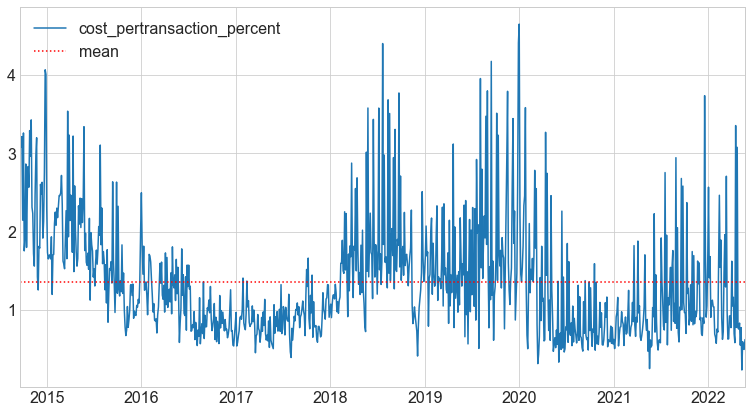

FEES_PERTRANSACTION


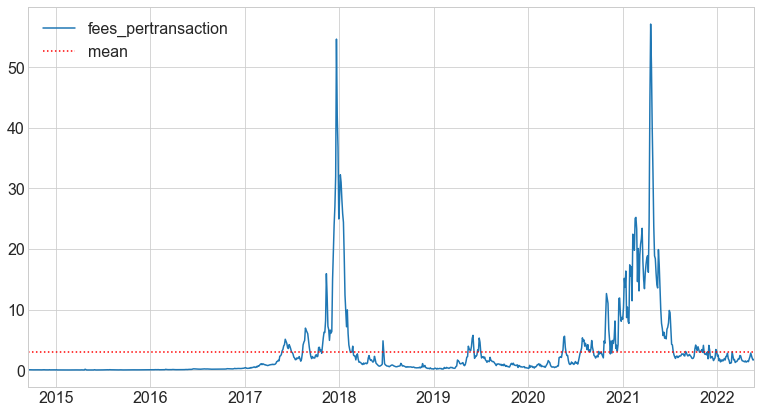

FEES_TOMINERS


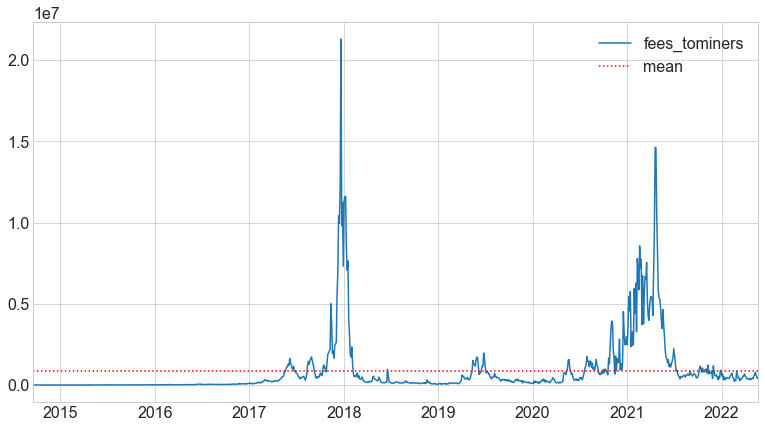

MINERS_REVENUE


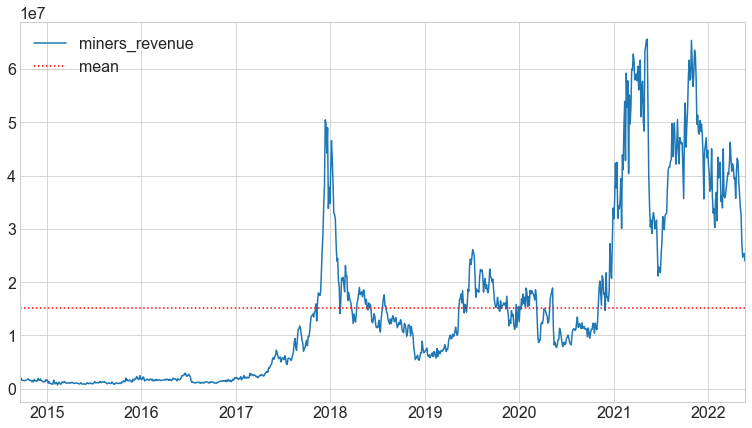

RELATIVE_DIFFICULTY


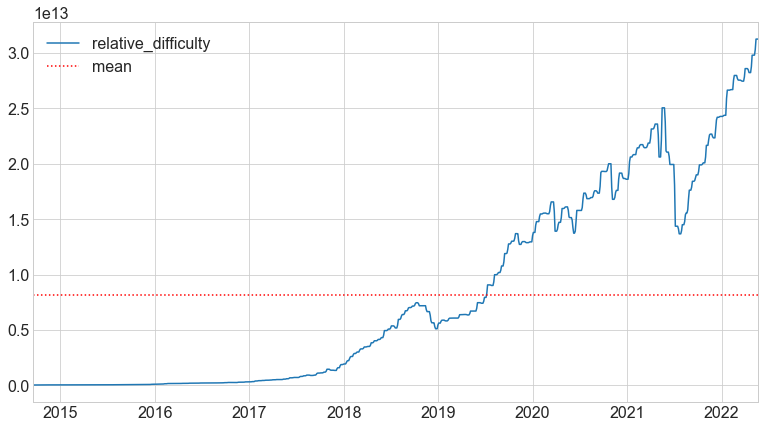

TOTAL_HASH_RATE


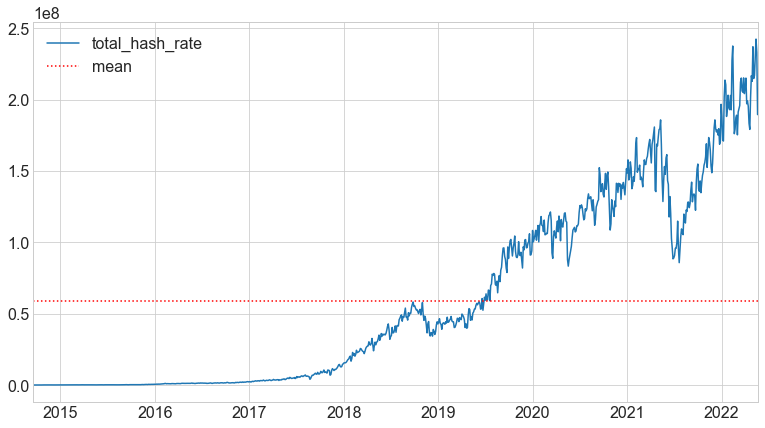

In [34]:
for col in df.columns:
    print(col.upper())
    df[col].resample('3D').mean().plot()
    plt.axhline(df[col].mean(), color='red', ls='dotted', label='mean')
    plt.legend()
    plt.show()

### Make a function to add all features of the CSV

In [35]:
def add_csv(df, filename):
    '''
    This fuction will add a csv data to the main dataframe
    '''
    # read the CSV file and assign a variable
    filename_df = pd.read_csv(f'~/codeup-data-science/financial_forecaster/project_csvs/{filename}.csv')
    # change dtype of timestamp into pandas date
    filename_df.Timestamp = pd.to_datetime(filename_df.Timestamp).dt.date
    # reset index to datetime
    filename_df = filename_df.set_index('Timestamp').sort_index()
    # reset index to datetime for dataframe
    df.index = pd.to_datetime(df.index)
    # remove times to index
    df.index = df.index.date
    # add the CSV_dataframe to given dataframe
    df[filename] = filename_df
    # fill the nulls
    df.fillna(method='ffill', inplace=True)
    # retunrs a dataframe
    return df

In [36]:
add_csv(df, 'miners-revenue')

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cost_pertransaction,cost_pertransaction_percent,fees_pertransaction,fees_tominers,miners_revenue,relative_difficulty,total_hash_rate,miners-revenue
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,NaN,4.231596,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,29.138967,4.231596,0.072554,6033.262208,2.423051e+06,NaN,NaN,2.423051e+06
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,29.138967,4.231596,0.072554,6033.262208,2.423051e+06,2.982973e+10,2.402207e+05,2.423051e+06
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,29.138967,3.069054,0.072554,6033.262208,2.423051e+06,2.982973e+10,2.402207e+05,2.423051e+06
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,29.910568,3.069054,0.064216,4207.641303,1.959830e+06,2.982973e+10,2.402207e+05,1.959830e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,96.257967,0.494886,1.857998,488480.736741,2.530689e+07,3.125110e+13,1.895271e+08,2.530689e+07
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,112.755347,0.494886,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08,2.548406e+07
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,112.755347,0.494886,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08,2.548406e+07
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,112.755347,0.620023,1.567418,354255.305563,2.548406e+07,3.125110e+13,1.895271e+08,2.548406e+07


In [143]:
df = clean_df()

cached csv


In [144]:
df.index.dtype

datetime64[ns, UTC]

In [145]:
df

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True
...,...,...,...,...,...,...,...,...,...
2022-05-20 00:00:00+00:00,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True
2022-05-21 00:00:00+00:00,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True
2022-05-22 00:00:00+00:00,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False


In [39]:
csv_filenames = ['avg-fees-per-transaction', 'cost-per-transaction-percent', 'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue', 'transaction-fees-to-miners']

for filename in csv_filenames:
    add_csv(df, filename)
df

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cost_pertransaction,...,miners_revenue,relative_difficulty,total_hash_rate,miners-revenue,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,transaction-fees-to-miners
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False,NaN,...,NaN,NaN,NaN,NaN,NaN,4.231596,NaN,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False,29.138967,...,2.423051e+06,NaN,NaN,2.423051e+06,0.072554,4.231596,29.138967,NaN,NaN,6033.262208
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True,29.138967,...,2.423051e+06,2.982973e+10,2.402207e+05,2.423051e+06,0.072554,4.231596,29.138967,2.982973e+10,2.402207e+05,6033.262208
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False,29.138967,...,2.423051e+06,2.982973e+10,2.402207e+05,2.423051e+06,0.072554,3.069054,29.138967,2.982973e+10,2.402207e+05,6033.262208
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,29.910568,...,1.959830e+06,2.982973e+10,2.402207e+05,1.959830e+06,0.064216,3.069054,29.910568,2.982973e+10,2.402207e+05,4207.641303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,96.257967,...,2.530689e+07,3.125110e+13,1.895271e+08,2.530689e+07,1.857998,0.494886,96.257967,3.125110e+13,1.895271e+08,488480.736741
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,112.755347,...,2.548406e+07,3.125110e+13,1.895271e+08,2.548406e+07,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,354255.305563
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,112.755347,...,2.548406e+07,3.125110e+13,1.895271e+08,2.548406e+07,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,354255.305563
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,112.755347,...,2.548406e+07,3.125110e+13,1.895271e+08,2.548406e+07,1.567418,0.620023,112.755347,3.125110e+13,1.895271e+08,354255.305563


In [374]:
def miner_features(df):  
    '''
    This function will add all the miner CSVs to a main dataframe
    '''
    # add all the CSV files to a variable
    csv_filenames = ['avg-fees-per-transaction', 'cost-per-transaction-percent', 'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue', 'transaction-fees-to-miners']
    # loop each CSV into the dataframe using add_cvs function
    for filename in csv_filenames:
        add_csv(df, filename)
        df.dropna(inplace=True)
    # return df
    return df

In [375]:
miner_features(df)

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-09-27,403.556000,406.622986,397.372009,399.519989,15029300,-0.057539,-22.338989,-0.055915,False,0.067053,3.212713,21.894919,2.982973e+10,2.417036e+05,1.451283e+06,4444.528891
2014-09-28,399.471008,401.016998,374.332001,377.181000,23613300,-0.004555,-1.713990,-0.004544,False,0.067053,3.212713,21.894919,3.466143e+10,2.395010e+05,1.451283e+06,4444.528891
2014-09-29,376.928009,385.210999,372.239990,375.467010,32497700,0.030109,11.476990,0.030567,True,0.067053,2.145034,21.894919,3.466143e+10,2.395010e+05,1.451283e+06,4444.528891
2014-09-30,376.088013,390.976990,373.442993,386.944000,34707300,-0.008641,-3.329010,-0.008603,False,0.057961,2.145034,19.115848,3.466143e+10,2.395010e+05,1.640656e+06,4974.620334
2014-10-01,387.427002,391.378998,380.779999,383.614990,26229400,-0.022521,-8.542999,-0.022270,False,0.057961,2.145034,19.115848,3.466143e+10,2.498392e+05,1.640656e+06,4974.620334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,1.857998,0.494886,96.257967,3.125110e+13,1.895271e+08,2.530689e+07,488480.736741
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,1.567418,0.620023,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563


In [376]:
df1 = miner_features(df)
df1

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-03,375.181000,377.695007,357.859009,359.511993,30901200,-0.089097,-30.645996,-0.085243,False,0.060243,3.259370,19.060249,3.466143e+10,2.498392e+05,1.517310e+06,4795.692917
2014-10-04,359.891998,364.487000,325.885986,328.865997,47236500,-0.025737,-8.355987,-0.025408,False,0.060243,3.259370,19.060249,3.466143e+10,2.463931e+05,1.517310e+06,4795.692917
2014-10-05,328.915985,341.800995,289.295990,320.510010,83308096,0.029419,9.569000,0.029856,True,0.060243,1.753492,19.060249,3.466143e+10,2.463931e+05,1.517310e+06,4795.692917
2014-10-06,320.389008,345.134003,302.559998,330.079010,79011800,0.018336,6.108002,0.018505,True,0.052130,1.753492,17.793289,3.466143e+10,2.463931e+05,1.486380e+06,4354.707986
2014-10-07,330.584015,339.247009,320.481995,336.187012,49199900,0.048630,16.752990,0.049832,True,0.052130,1.753492,17.793289,3.466143e+10,2.601774e+05,1.486380e+06,4354.707986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,1.857998,0.494886,96.257967,3.125110e+13,1.895271e+08,2.530689e+07,488480.736741
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,1.567418,0.620023,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563


In [43]:
df1 = df1.drop(columns='fwd_close_positive')

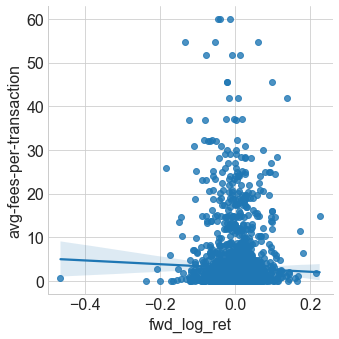

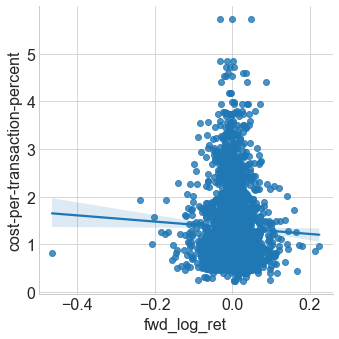

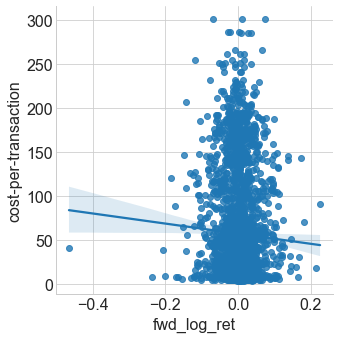

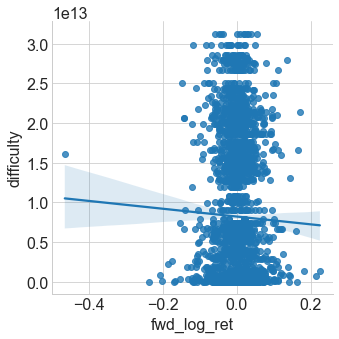

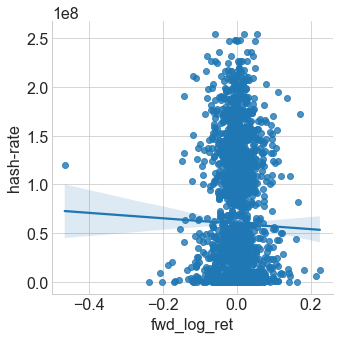

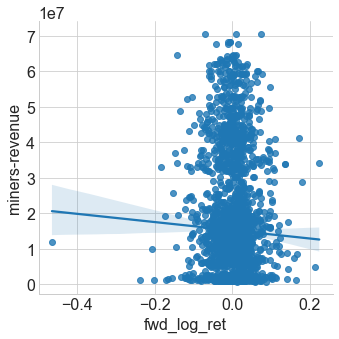

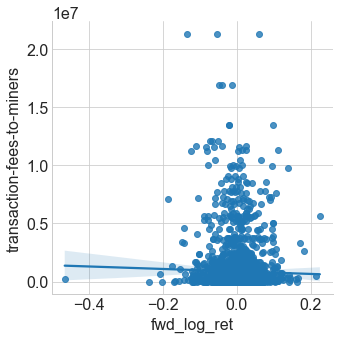

In [383]:
miner_cols = ['avg-fees-per-transaction', 'cost-per-transaction-percent', 'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue', 'transaction-fees-to-miners']
for col in miner_cols:
    sns.lmplot(x= 'fwd_log_ret', y = col, data=df1)


Relationship with returns

avg-fees-per-transaction


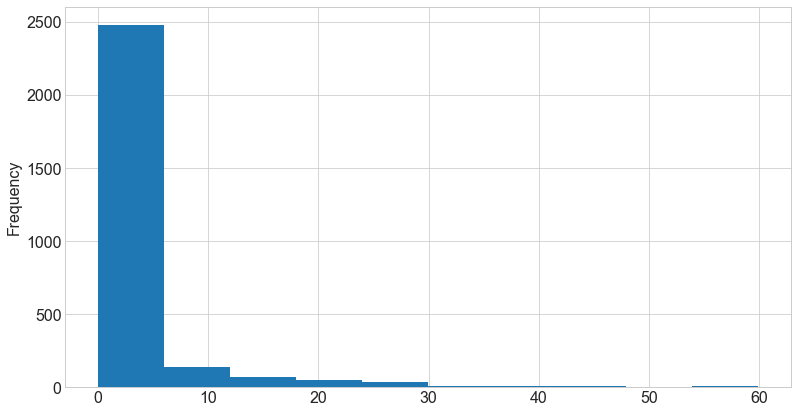

cost-per-transaction-percent


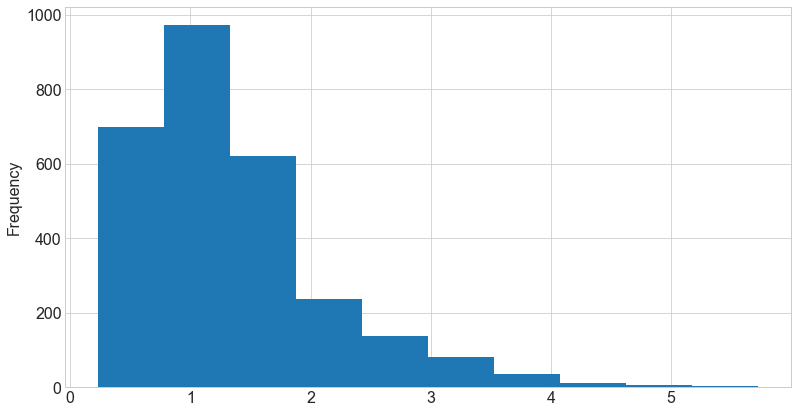

cost-per-transaction


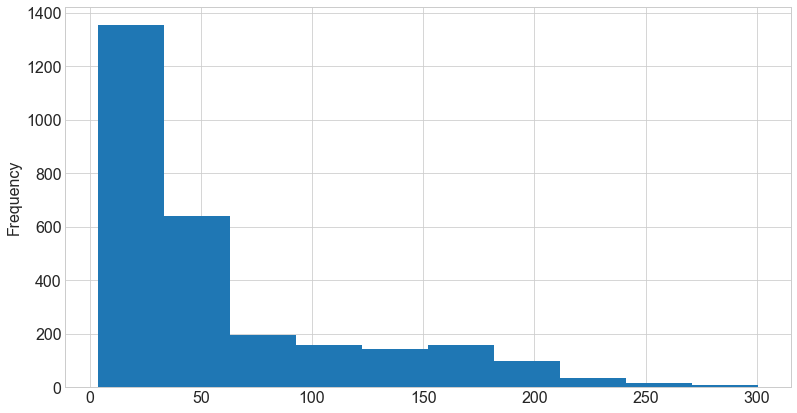

difficulty


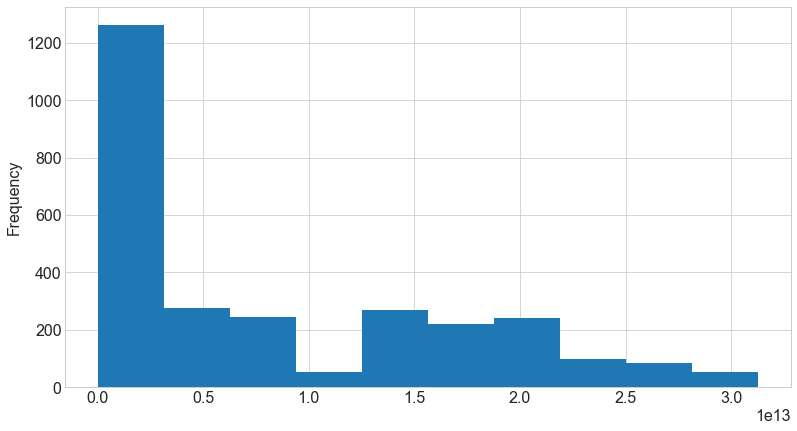

hash-rate


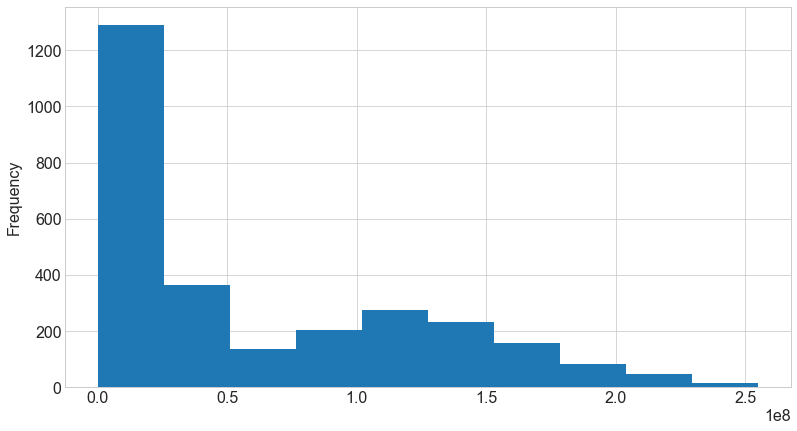

miners-revenue


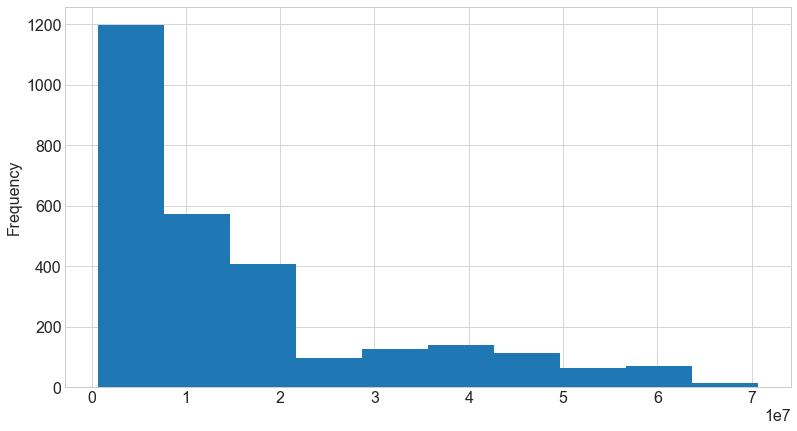

transaction-fees-to-miners


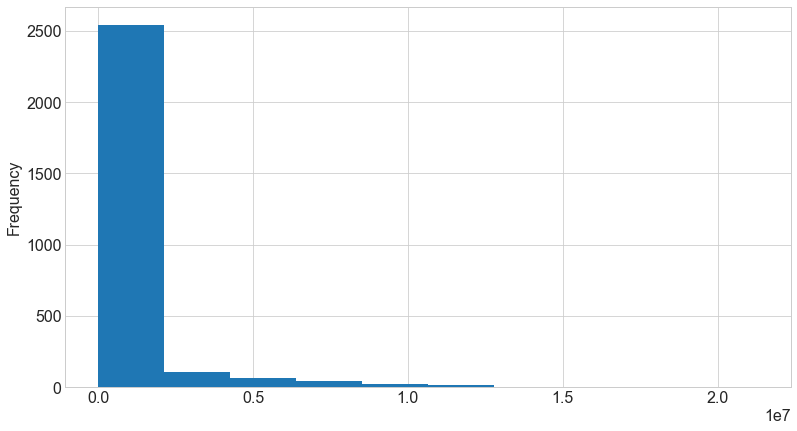

In [286]:
for col in miner_cols:
    print(col)
    df1[col].plot.hist()
    plt.show() 

In [331]:
df3 = clean_df()

cached csv


In [332]:
def add_csv_3yr(df, filename):
    '''
    This fuction will add a csv data to the main dataframe
    '''
    # read the CSV file and assign a variable
    print(f'reading {filename}')
    filename_df = pd.read_csv(f'~/codeup-data-science/financial_forecaster/project_csvs/{filename}.csv')
    # change dtype of timestamp into pandas date
    filename_df.Timestamp = pd.to_datetime(filename_df.Timestamp).dt.date
    # reset index to datetime
    filename_df = filename_df.set_index('Timestamp').sort_index()
    filename_df.columns = [filename]
    # reset index to datetime for dataframe
    df.index = pd.to_datetime(df.index)
    # remove times to index
    df.index = df.index.date
    # add the CSV_dataframe to given dataframe
    df = df.join(filename_df, how='right')
    df = df.dropna()
    # retunrs a dataframe
    return df

In [333]:
def miner_features_3yr(df):  
    '''
    This function will add all the miner CSVs to a main dataframe
    '''
    # add all the CSV files to a variable
    csv_filenames = ['avg-fees-per-transaction_3yr', 'cost-per-transaction-percent_3yr', 'cost-per-transaction_3yr', 'difficulty_3yr', 'hash-rate_3yr', 'miners-revenue_3yr', 'transaction-fees-to-miners_3yr']
    # loop each CSV into the dataframe using add_cvs function
    print('running loop')
    for filename in csv_filenames:
        df = add_csv_3yr(df, filename)
        df.index = pd.to_datetime(df.index)
        print(f'adding {filename}')
    # return df
    print('done')
    return df

In [334]:
add_csv_3yr(df3,'avg-fees-per-transaction_3yr') 

reading avg-fees-per-transaction_3yr


,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,avg-fees-per-transaction_3yr
2019-06-08,8036.774902,8076.891113,7837.610840,7954.127930,1.652272e+10,-0.034020,-266.050782,-0.033448,False,1.980147
2019-06-09,7949.674805,7975.974121,7583.219727,7688.077148,1.661073e+10,0.039812,312.252442,0.040615,True,1.627762
2019-06-10,7692.284668,8031.909668,7586.730957,8000.329590,1.868928e+10,-0.009118,-72.615235,-0.009077,False,2.246521
2019-06-11,8004.243652,8026.394043,7772.803711,7927.714355,1.710728e+10,0.027145,218.143067,0.027517,True,2.563458
2019-06-12,7925.434082,8196.648438,7862.359863,8145.857422,1.903443e+10,0.010389,85.066406,0.010443,True,2.662764
...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,3.074938e+10,0.007896,231.486329,0.007927,True,1.905859
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,1.727484e+10,0.029840,891.496093,0.030290,True,1.567418
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,2.163153e+10,-0.041230,-1224.812500,-0.040391,False,1.661592
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,3.148345e+10,0.018950,556.675782,0.019130,True,1.798277


In [354]:
df3y = miner_features_3yr(df3)
df3y

running loop
reading avg-fees-per-transaction_3yr
adding avg-fees-per-transaction_3yr
reading cost-per-transaction-percent_3yr
adding cost-per-transaction-percent_3yr
reading cost-per-transaction_3yr
adding cost-per-transaction_3yr
reading difficulty_3yr
adding difficulty_3yr
reading hash-rate_3yr
adding hash-rate_3yr
reading miners-revenue_3yr
adding miners-revenue_3yr
reading transaction-fees-to-miners_3yr
adding transaction-fees-to-miners_3yr
done


,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,avg-fees-per-transaction_3yr,cost-per-transaction-percent_3yr,cost-per-transaction_3yr,difficulty_3yr,hash-rate_3yr,miners-revenue_3yr,transaction-fees-to-miners_3yr
2019-06-08,8036.774902,8076.891113,7837.610840,7954.127930,1.652272e+10,-0.034020,-266.050782,-0.033448,False,1.980147,2.396526,43.762328,7.459681e+12,5.456392e+07,1.288227e+07,582893.909291
2019-06-09,7949.674805,7975.974121,7583.219727,7688.077148,1.661073e+10,0.039812,312.252442,0.040615,True,1.627762,3.498270,49.066414,7.459681e+12,5.313360e+07,1.504048e+07,498962.708960
2019-06-10,7692.284668,8031.909668,7586.730957,8000.329590,1.868928e+10,-0.009118,-72.615235,-0.009077,False,2.246521,1.592973,45.557372,7.459681e+12,5.398120e+07,1.631842e+07,804692.654422
2019-06-11,8004.243652,8026.394043,7772.803711,7927.714355,1.710728e+10,0.027145,218.143067,0.027517,True,2.563458,0.938603,44.014417,7.459681e+12,5.599423e+07,1.498466e+07,872726.856256
2019-06-12,7925.434082,8196.648438,7862.359863,8145.857422,1.903443e+10,0.010389,85.066406,0.010443,True,2.662764,1.205745,42.747922,7.459681e+12,5.541151e+07,1.404115e+07,874622.138330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,3.074938e+10,0.007896,231.486329,0.007927,True,1.905859,0.494886,91.359248,3.125110e+13,2.179340e+08,2.439603e+07,508929.182104
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,1.727484e+10,0.029840,891.496093,0.030290,True,1.567418,1.740420,112.755347,3.125110e+13,2.126077e+08,2.548406e+07,354255.305563
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,2.163153e+10,-0.041230,-1224.812500,-0.040391,False,1.661592,1.358585,110.067662,3.125110e+13,2.112761e+08,2.300931e+07,347350.894021
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,3.148345e+10,0.018950,556.675782,0.019130,True,1.798277,0.620023,115.523305,3.125110e+13,2.112761e+08,3.062592e+07,476734.056568


In [336]:
df3y.index

DatetimeIndex(['2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15',
               ...
               '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', length=476, freq=None)

In [174]:
df2 = miner_features(df)

In [175]:
df2

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True,0.064216,NaN,29.910568,NaN,NaN,1.959830e+06,4207.641303
2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,0.080333,33.638977,0.083647,True,0.064216,NaN,29.910568,2.982973e+10,2.328065e+05,1.959830e+06,4207.641303
2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,-0.029306,-12.585998,-0.028881,False,0.064216,3.120719,29.910568,2.982973e+10,2.328065e+05,1.959830e+06,4207.641303
2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700,-0.027868,-11.630982,-0.027483,False,0.072386,3.120719,24.075886,2.982973e+10,2.328065e+05,1.964039e+06,5905.026196
2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400,-0.017523,-7.149017,-0.017370,False,0.072386,3.120719,24.075886,2.982973e+10,2.417036e+05,1.964039e+06,5905.026196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-20,30311.119141,30664.976563,28793.605469,29200.740234,30749382605,0.007896,231.486329,0.007927,True,1.857998,0.494886,96.257967,3.125110e+13,1.895271e+08,2.530689e+07,488480.736741
2022-05-21,29199.859375,29588.869141,29027.394531,29432.226563,17274840442,0.029840,891.496093,0.030290,True,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563
2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,21631532270,-0.041230,-1224.812500,-0.040391,False,1.567418,0.494886,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,31483454557,0.018950,556.675782,0.019130,True,1.567418,0.620023,112.755347,3.125110e+13,1.895271e+08,2.548406e+07,354255.305563


In [215]:
df2.columns, df2.dtypes

(Index(['open', 'high', 'low', 'close', 'volume', 'fwd_log_ret', 'fwd_ret',
        'fwd_pct_chg', 'fwd_close_positive', 'avg-fees-per-transaction',
        'cost-per-transaction-percent', 'cost-per-transaction', 'difficulty',
        'hash-rate', 'miners-revenue', 'transaction-fees-to-miners'],
       dtype='object'),
 open                            float64
 high                            float64
 low                             float64
 close                           float64
 volume                            int64
 fwd_log_ret                     float64
 fwd_ret                         float64
 fwd_pct_chg                     float64
 fwd_close_positive                 bool
 avg-fees-per-transaction        float64
 cost-per-transaction-percent    float64
 cost-per-transaction            float64
 difficulty                      float64
 hash-rate                       float64
 miners-revenue                  float64
 transaction-fees-to-miners      float64
 dtype: object)

In [240]:
filename_df = pd.read_csv(f'~/codeup-data-science/financial_forecaster/project_csvs/avg-fees-per-transaction_3yr.csv')
filename_df.Timestamp = pd.to_datetime(filename_df.Timestamp)
filename_df = filename_df.set_index('Timestamp').sort_index()
filename_df.columns = ['filename']
filename_df

,filename
Timestamp,
2019-06-08,1.980147
2019-06-09,1.627762
2019-06-10,2.246521
2019-06-11,2.563458
2019-06-12,2.662764
...,...
2022-06-01,2.140560
2022-06-02,2.218319
2022-06-03,2.024524


    # change dtype of timestamp into pandas date
    filename_df.Timestamp = pd.to_datetime(filename_df.Timestamp).dt.date
    # reset index to datetime
    filename_df = filename_df.set_index('Timestamp').sort_index()
    # reset index to datetime for dataframe
    df.index = pd.to_datetime(df.index)
    # remove times to index
    df.index = df.index.date
    # add the CSV_dataframe to given dataframe
    df[filename] = filename_df

In [115]:
df1.index = pd.to_datetime(df1.index)
df1.dtypes


open                            float64
high                            float64
low                             float64
close                           float64
volume                            int64
fwd_log_ret                     float64
fwd_ret                         float64
fwd_pct_chg                     float64
fwd_close_positive                 bool
cost_pertransaction             float64
cost_pertransaction_percent     float64
fees_pertransaction             float64
fees_tominers                   float64
miners_revenue                  float64
relative_difficulty             float64
total_hash_rate                 float64
miners-revenue                  float64
avg-fees-per-transaction        float64
cost-per-transaction-percent    float64
cost-per-transaction            float64
difficulty                      float64
hash-rate                       float64
transaction-fees-to-miners      float64
dtype: object

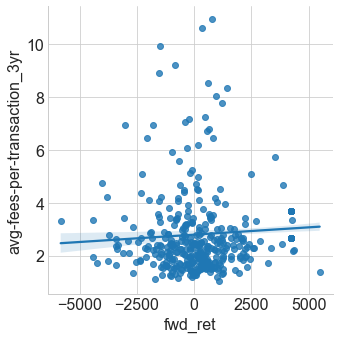

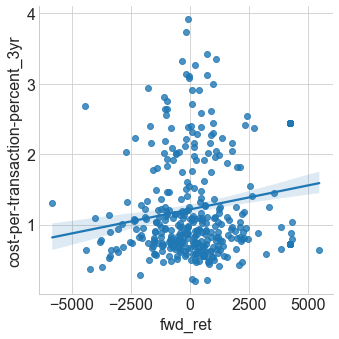

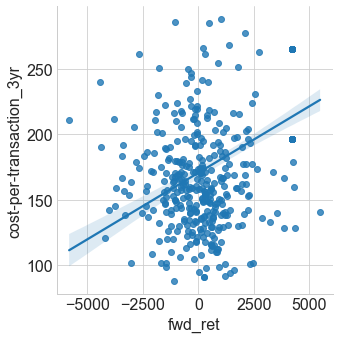

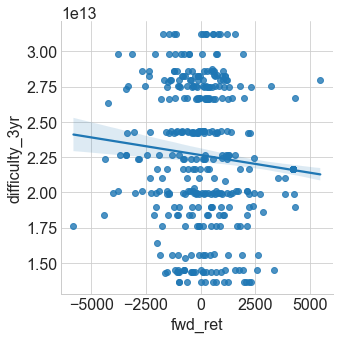

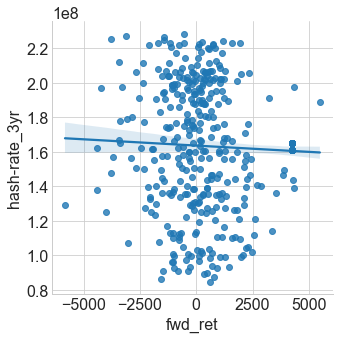

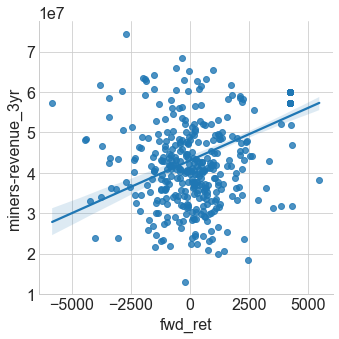

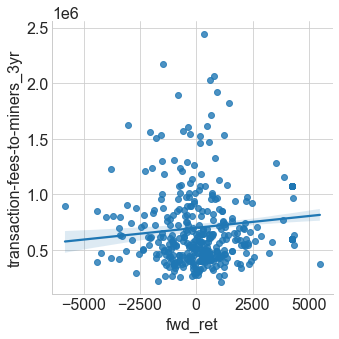

In [342]:
csv_filenames = ['avg-fees-per-transaction_3yr', 'cost-per-transaction-percent_3yr', 'cost-per-transaction_3yr', 'difficulty_3yr', 'hash-rate_3yr', 'miners-revenue_3yr', 'transaction-fees-to-miners_3yr']

for col in csv_filenames:
    sns.lmplot(x= 'fwd_ret', y = col, data = df3y)
    


In [325]:
df3y.index

DatetimeIndex(['2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15',
               ...
               '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', length=476, freq=None)

In [337]:
df3y.corr()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,avg-fees-per-transaction_3yr,cost-per-transaction-percent_3yr,cost-per-transaction_3yr,difficulty_3yr,hash-rate_3yr,miners-revenue_3yr,transaction-fees-to-miners_3yr
open,1.000000,0.997142,0.994829,0.991391,-0.136048,0.451445,0.547000,0.456308,0.055360,0.223603,0.791646,-0.183859,-0.039588,0.944727,0.208698
high,0.997142,1.000000,0.995380,0.996289,-0.124798,0.459924,0.556663,0.464855,0.065987,0.216601,0.789529,-0.192961,-0.049608,0.945720,0.220599
low,0.994829,0.995380,1.000000,0.996711,-0.188597,0.468131,0.567960,0.473242,0.048812,0.240680,0.798789,-0.180965,-0.035566,0.946860,0.200039
close,0.991391,0.996289,0.996711,1.000000,-0.166912,0.476640,0.577017,0.481796,0.063762,0.234431,0.798247,-0.192147,-0.047943,0.946506,0.213682
volume,-0.136048,-0.124798,-0.188597,-0.166912,1.000000,-0.215405,-0.273843,-0.218829,0.243554,-0.336195,-0.246709,-0.089705,-0.146464,-0.155120,0.265675
fwd_log_ret,0.451445,0.459924,0.468131,0.476640,-0.215405,1.000000,0.972104,0.999636,0.073173,0.166842,0.403398,-0.138258,-0.071645,0.428957,0.122300
fwd_ret,0.547000,0.556663,0.567960,0.577017,-0.273843,0.972104,1.000000,0.974350,0.092630,0.205800,0.490343,-0.133120,-0.051108,0.514683,0.146528
fwd_pct_chg,0.456308,0.464855,0.473242,0.481796,-0.218829,0.999636,0.974350,1.000000,0.075403,0.166772,0.407431,-0.138430,-0.071178,0.433136,0.124692
avg-fees-per-transaction_3yr,0.055360,0.065987,0.048812,0.063762,0.243554,0.073173,0.092630,0.075403,1.000000,-0.114949,-0.036666,-0.393365,-0.551648,-0.070116,0.863248
cost-per-transaction-percent_3yr,0.223603,0.216601,0.240680,0.234431,-0.336195,0.166842,0.205800,0.166772,-0.114949,1.000000,0.463874,-0.112893,-0.052852,0.268341,-0.178146


<AxesSubplot:>

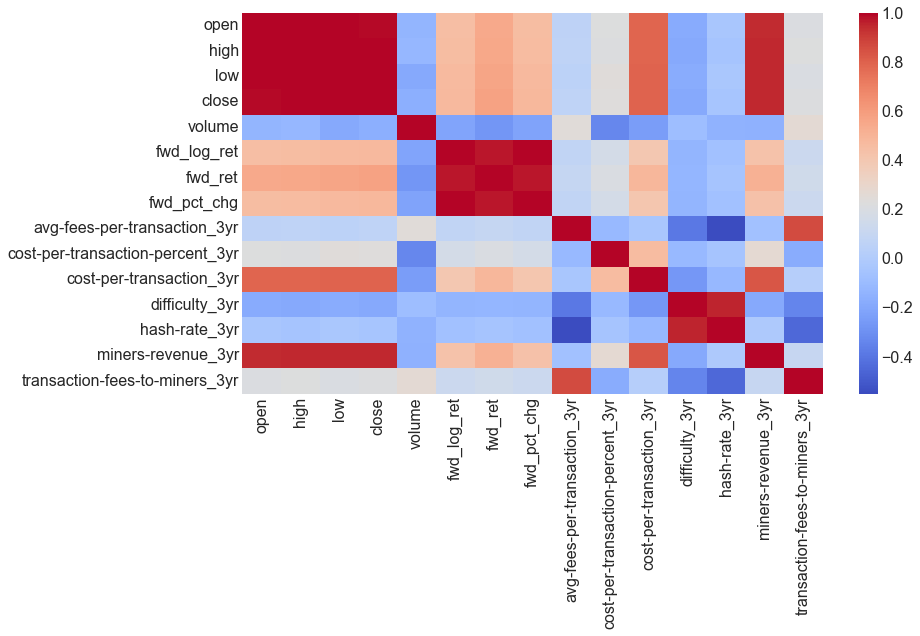

In [338]:
sns.heatmap(df3y.corr(), cmap='coolwarm')

H0: There is no linear correlation between the forward return and the miners revenue.

Ha: There is a linear correlation between the forward return and the miners revenue.

In [347]:
df3y.columns

Index(['open', 'high', 'low', 'close', 'volume', 'fwd_log_ret', 'fwd_ret',
       'fwd_pct_chg', 'fwd_close_positive', 'avg-fees-per-transaction_3yr',
       'cost-per-transaction-percent_3yr', 'cost-per-transaction_3yr',
       'difficulty_3yr', 'hash-rate_3yr', 'miners-revenue_3yr',
       'transaction-fees-to-miners_3yr'],
      dtype='object')

In [353]:
x = df3y['fwd_ret']
y = df3y['miners-revenue_3yr']

alpha = .05
r, p = stats.pearsonr(x,y)
print(f'Correlation Coefficient by Pearson Test: {r}, p-value: {p}')

if p < alpha:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')


Correlation Coefficient by Pearson Test: 0.5146834130604889, p-value: 1.4928820655696944e-33
We can reject the null hypothesis


In [369]:
def hyp_test(x_feature, y_feature, df):
    
    print(f'H0: There is no linear correlation between {x_feature} and {y_feature}')
    print(f'Ha: There is a linear correlation between {x_feature} and {y_feature}')
    
    x = df[x_feature]
    y = df[y_feature]
    
    alpha = .05
    
    r, p = stats.pearsonr(x,y)
    
    print(f'Correlation Coefficient by Pearson Test: {r}, p-value: {p}')
    
    if p < alpha:
        print('We can REJECT the null hypothesis')
    else:
        print('we CANNOT reject the null hypothesis')

In [370]:
hyp_test('open', 'miners-revenue_3yr', df3y)

H0: There is no linear correlation between open and miners-revenue_3yr
Ha: There is a linear correlation between open and miners-revenue_3yr
Correlation Coefficient by Pearson Test: 0.9641809382025136, p-value: 0.0
We can REJECT the null hypothesis


In [371]:
original_columns = ['open', 'high', 'low', 'close', 'volume', 'fwd_log_ret', 'fwd_ret', 'fwd_pct_chg', 'fwd_close_positive']

for col in original_columns:
    for col2 in csv_filenames:
        print(col.upper(),' vs ',col2.upper())
        hyp_test(col, col2, df3y)

OPEN  vs  AVG-FEES-PER-TRANSACTION_3YR
H0: There is no linear correlation between open and avg-fees-per-transaction_3yr
Ha: There is a linear correlation between open and avg-fees-per-transaction_3yr
Correlation Coefficient by Pearson Test: 0.3023615196704503, p-value: 3.510239064952214e-32
We can REJECT the null hypothesis
OPEN  vs  COST-PER-TRANSACTION-PERCENT_3YR
H0: There is no linear correlation between open and cost-per-transaction-percent_3yr
Ha: There is a linear correlation between open and cost-per-transaction-percent_3yr
Correlation Coefficient by Pearson Test: -0.06553625189308267, p-value: 0.012345703887708288
We can REJECT the null hypothesis
OPEN  vs  COST-PER-TRANSACTION_3YR
H0: There is no linear correlation between open and cost-per-transaction_3yr
Ha: There is a linear correlation between open and cost-per-transaction_3yr
Correlation Coefficient by Pearson Test: 0.9587115833464185, p-value: 0.0
We can REJECT the null hypothesis
OPEN  vs  DIFFICULTY_3YR
H0: There is n

<AxesSubplot:>

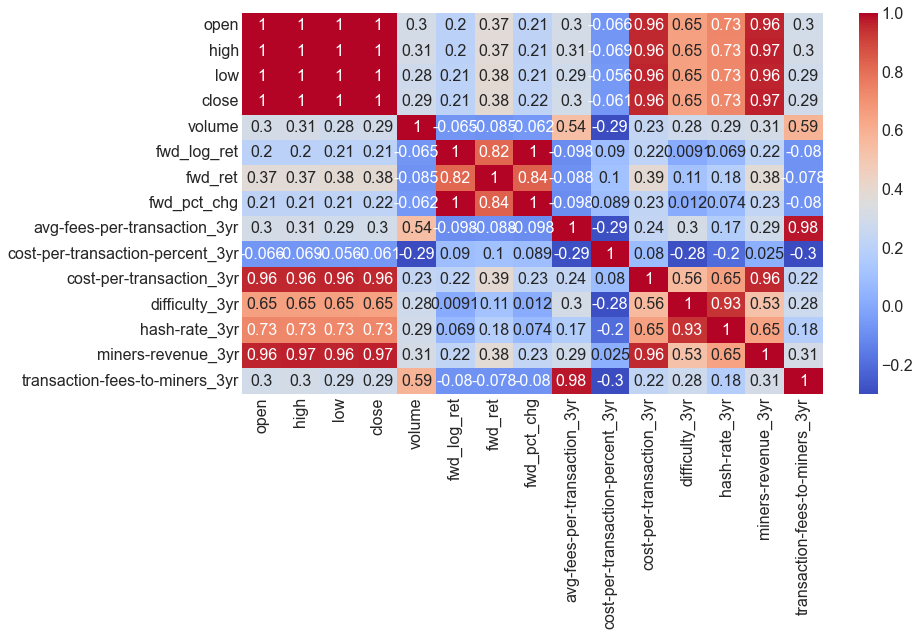

In [385]:
sns.heatmap(df3y.corr(), cmap='coolwarm', annot= True )

In [380]:
df1.index.min()

datetime.date(2014, 10, 3)

In [377]:
for col in original_columns:
    for col2 in miner_cols:
        print(col.upper(),' vs ',col2.upper())
        hyp_test(col, col2, df1)

OPEN  vs  AVG-FEES-PER-TRANSACTION
H0: There is no linear correlation between open and avg-fees-per-transaction
Ha: There is a linear correlation between open and avg-fees-per-transaction
Correlation Coefficient by Pearson Test: 0.4712292657205039, p-value: 2.7043345916173965e-154
We can REJECT the null hypothesis
OPEN  vs  COST-PER-TRANSACTION-PERCENT
H0: There is no linear correlation between open and cost-per-transaction-percent
Ha: There is a linear correlation between open and cost-per-transaction-percent
Correlation Coefficient by Pearson Test: -0.16198869396334303, p-value: 7.246124746171962e-18
We can REJECT the null hypothesis
OPEN  vs  COST-PER-TRANSACTION
H0: There is no linear correlation between open and cost-per-transaction
Ha: There is a linear correlation between open and cost-per-transaction
Correlation Coefficient by Pearson Test: 0.9437742047779631, p-value: 0.0
We can REJECT the null hypothesis
OPEN  vs  DIFFICULTY
H0: There is no linear correlation between open and

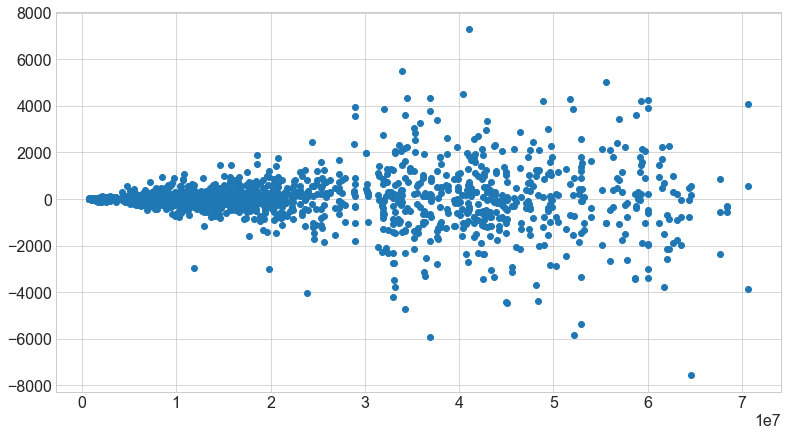

In [431]:
plt.scatter(data=df1, x='miners-revenue', y='fwd_ret')


### Takeaways:
  
- When we analyze the 7+ year there are 24 interactions that are not able to reject the null hypothesis
    - Forward LOG Return
        1. FWD_LOG_RET  vs  AVG-FEES-PER-TRANSACTION
        1. FWD_LOG_RET  vs  COST-PER-TRANSACTION-PERCENT
        1. FWD_LOG_RET  vs  DIFFICULTY
        1. FWD_LOG_RET  vs  HASH-RATE
        1. FWD_LOG_RET  vs  MINERS-REVENUE
        1. FWD_LOG_RET  vs  TRANSACTION-FEES-TO-MINERS
    - Forward Return
        1. FWD_RET  vs  AVG-FEES-PER-TRANSACTION
        1. FWD_RET  vs  COST-PER-TRANSACTION-PERCENT
        1. FWD_RET  vs  COST-PER-TRANSACTION
        1. FWD_RET  vs  DIFFICULTY
        1. FWD_RET  vs  HASH-RATE
        1. FWD_RET  vs  MINERS-REVENUE
        1. FWD_RET  vs  TRANSACTION-FEES-TO-MINERS
    - Forward Percent Change
        1. FWD_PCT_CHG  vs  AVG-FEES-PER-TRANSACTION
        1. FWD_PCT_CHG  vs  COST-PER-TRANSACTION-PERCENT
        1. FWD_PCT_CHG  vs  COST-PER-TRANSACTION
        1. FWD_PCT_CHG  vs  DIFFICULTY
        1. FWD_PCT_CHG  vs  HASH-RATE
        1. FWD_PCT_CHG  vs  MINERS-REVENUE
        1. FWD_PCT_CHG  vs  TRANSACTION-FEES-TO-MINERS
    - Forward Close Positive
        1. FWD_CLOSE_POSITIVE  vs  AVG-FEES-PER-TRANSACTION
        1. FWD_CLOSE_POSITIVE  vs  DIFFICULTY
        1. FWD_CLOSE_POSITIVE  vs  HASH-RATE
        1. FWD_CLOSE_POSITIVE  vs  TRANSACTION-FEES-TO-MINERS


- In the 3 yr CSVs only three feature were not able to reject the null hypothesis
    - Forward LOG Return vs Difficult to mine a new block
    - Forward percent Change vs Difficult to mine a new block
    - Forward close positive vs Total hash rate
    
  

## 3 year csvs

FWD_LOG_RET  vs  DIFFICULTY_3YR
- H0: There is no linear correlation between fwd_log_ret and difficulty_3yr
- Ha: There is a linear correlation between fwd_log_ret and difficulty_3yr
- Correlation Coefficient by Pearson Test: 0.009140867112121625, p-value: 0.7273739809057381
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  DIFFICULTY_3YR
- H0: There is no linear correlation between fwd_pct_chg and difficulty_3yr
- Ha: There is a linear correlation between fwd_pct_chg and difficulty_3yr
- Correlation Coefficient by Pearson Test: 0.011803896929411114, p-value: 0.6525722728648499
- we CANNOT reject the null hypothesis

FWD_CLOSE_POSITIVE  vs  HASH-RATE_3YR
- H0: There is no linear correlation between fwd_close_positive and hash-rate_3yr
- Ha: There is a linear correlation between fwd_close_positive and hash-rate_3yr
- Correlation Coefficient by Pearson Test: 0.026249034381022694, p-value: 0.3167031593892862
- we CANNOT reject the null hypothesis


## All info csvs

FWD_LOG_RET  vs  AVG-FEES-PER-TRANSACTION
- H0: There is no linear correlation between fwd_log_ret and avg-fees-per-transaction
- Ha: There is a linear correlation between fwd_log_ret and avg-fees-per-transaction
- Correlation Coefficient by Pearson Test: -0.026880751307927626, p-value: 0.15568682442833137
- we CANNOT reject the null hypothesis

FWD_LOG_RET  vs  COST-PER-TRANSACTION-PERCENT
- H0: There is no linear correlation between fwd_log_ret and cost-per-transaction-percent
- Ha: There is a linear correlation between fwd_log_ret and cost-per-transaction-percent
- Correlation Coefficient by Pearson Test: -0.033121592671620036, p-value: 0.08020340388279544
- we CANNOT reject the null hypothesis

FWD_LOG_RET  vs  DIFFICULTY
- H0: There is no linear correlation between fwd_log_ret and difficulty
- Ha: There is a linear correlation between fwd_log_ret and difficulty
- Correlation Coefficient by Pearson Test: -0.02161539789568558, p-value: 0.25363634727031675
- we CANNOT reject the null hypothesis

FWD_LOG_RET  vs  HASH-RATE
- H0: There is no linear correlation between fwd_log_ret and hash-rate
- Ha: There is a linear correlation between fwd_log_ret and hash-rate
- Correlation Coefficient by Pearson Test: -0.016903451693407033, p-value: 0.3720330263834628
- we CANNOT reject the null hypothesis

FWD_LOG_RET  vs  MINERS-REVENUE
- H0: There is no linear correlation between fwd_log_ret and miners-revenue
- Ha: There is a linear correlation between fwd_log_ret and miners-revenue
- Correlation Coefficient by Pearson Test: -0.02830379164133698, p-value: 0.1349362161879432
- we CANNOT reject the null hypothesis

FWD_LOG_RET  vs  TRANSACTION-FEES-TO-MINERS
- H0: There is no linear correlation between fwd_log_ret and transaction-fees-to-miners
- Ha: There is a linear correlation between fwd_log_ret and transaction-fees-to-miners
- Correlation Coefficient by Pearson Test: -0.021458334044866793, p-value: 0.2571031401818155
- we CANNOT reject the null hypothesis

FWD_RET  vs  AVG-FEES-PER-TRANSACTION
- H0: There is no linear correlation between fwd_ret and avg-fees-per-transaction
- Ha: There is a linear correlation between fwd_ret and avg-fees-per-transaction
- Correlation Coefficient by Pearson Test: -0.0319565072843623, p-value: 0.0914238235745634
- we CANNOT reject the null hypothesis

FWD_RET  vs  COST-PER-TRANSACTION-PERCENT
- H0: There is no linear correlation between fwd_ret and cost-per-transaction-percent
- Ha: There is a linear correlation between fwd_ret and cost-per-transaction-percent
- Correlation Coefficient by Pearson Test: -0.0041077154331931685, p-value: 0.8282753954772702
- we CANNOT reject the null hypothesis

FWD_RET  vs  COST-PER-TRANSACTION
- H0: There is no linear correlation between fwd_ret and cost-per-transaction
- Ha: There is a linear correlation between fwd_ret and cost-per-transaction
- Correlation Coefficient by Pearson Test: -0.02140826459172061, p-value: 0.2582151757594886
- we CANNOT reject the null hypothesis

FWD_RET  vs  DIFFICULTY
- H0: There is no linear correlation between fwd_ret and difficulty
- Ha: There is a linear correlation between fwd_ret and difficulty
- Correlation Coefficient by Pearson Test: -0.008475485234611385, p-value: 0.654465990364796
- we CANNOT reject the null hypothesis

FWD_RET  vs  HASH-RATE
- H0: There is no linear correlation between fwd_ret and hash-rate
- Ha: There is a linear correlation between fwd_ret and hash-rate
- Correlation Coefficient by Pearson Test: -0.004904298130053463, p-value: 0.7956513271592781
- we CANNOT reject the null hypothesis

FWD_RET  vs  MINERS-REVENUE
- H0: There is no linear correlation between fwd_ret and miners-revenue
- Ha: There is a linear correlation between fwd_ret and miners-revenue
- Correlation Coefficient by Pearson Test: -0.014207133609495519, p-value: 0.4530961341618603
- we CANNOT reject the null hypothesis

FWD_RET  vs  TRANSACTION-FEES-TO-MINERS
- H0: There is no linear correlation between fwd_ret and transaction-fees-to-miners
- Ha: There is a linear correlation between fwd_ret and transaction-fees-to-miners
- Correlation Coefficient by Pearson Test: -0.02182452218116456, p-value: 0.24907113396264804
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  AVG-FEES-PER-TRANSACTION
- H0: There is no linear correlation between fwd_pct_chg and avg-fees-per-transaction
- Ha: There is a linear correlation between fwd_pct_chg and avg-fees-per-transaction
- Correlation Coefficient by Pearson Test: -0.02062848286828221, p-value: 0.2759648634197181
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  COST-PER-TRANSACTION-PERCENT
- H0: There is no linear correlation between fwd_pct_chg and cost-per-transaction-percent
- Ha: There is a linear correlation between fwd_pct_chg and cost-per-transaction-percent
- Correlation Coefficient by Pearson Test: -0.036479767324703025, p-value: 0.053979494853169926
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  COST-PER-TRANSACTION
- H0: There is no linear correlation between fwd_pct_chg and cost-per-transaction
- Ha: There is a linear correlation between fwd_pct_chg and cost-per-transaction
- Correlation Coefficient by Pearson Test: -0.03523333480272814, p-value: 0.06272749975009043
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  DIFFICULTY
- H0: There is no linear correlation between fwd_pct_chg and difficulty
- Ha: There is a linear correlation between fwd_pct_chg and difficulty
- Correlation Coefficient by Pearson Test: -0.02162259341881134, p-value: 0.2534783070413038
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  HASH-RATE
- H0: There is no linear correlation between fwd_pct_chg and hash-rate
- Ha: There is a linear correlation between fwd_pct_chg and hash-rate
- Correlation Coefficient by Pearson Test: -0.017059729145016352, p-value: 0.3676277295950462
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  MINERS-REVENUE
- H0: There is no linear correlation between fwd_pct_chg and miners-revenue
- Ha: There is a linear correlation between fwd_pct_chg and miners-revenue
- Correlation Coefficient by Pearson Test: -0.025293743349742763, p-value: 0.18158802572908503
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  TRANSACTION-FEES-TO-MINERS
- H0: There is no linear correlation between fwd_pct_chg and transaction-fees-to-miners
- Ha: There is a linear correlation between fwd_pct_chg and transaction-fees-to-miners
- Correlation Coefficient by Pearson Test: -0.015056784319604874, p-value: 0.4265335882586375
- we CANNOT reject the null hypothesis

FWD_CLOSE_POSITIVE  vs  AVG-FEES-PER-TRANSACTION
- H0: There is no linear correlation between fwd_close_positive and avg-fees-per-transaction
- Ha: There is a linear correlation between fwd_close_positive and avg-fees-per-transaction
- Correlation Coefficient by Pearson Test: -0.029134711133463904, p-value: 0.12384788393721406
- we CANNOT reject the null hypothesis

FWD_CLOSE_POSITIVE  vs  DIFFICULTY
- H0: There is no linear correlation between fwd_close_positive and difficulty
- Ha: There is a linear correlation between fwd_close_positive and difficulty
- Correlation Coefficient by Pearson Test: -0.03614157563973548, p-value: 0.05624599832738313
- we CANNOT reject the null hypothesis

FWD_CLOSE_POSITIVE  vs  HASH-RATE
- H0: There is no linear correlation between fwd_close_positive and hash-rate
- Ha: There is a linear correlation between fwd_close_positive and hash-rate
- Correlation Coefficient by Pearson Test: -0.032833056604429395, p-value: 0.08287229032929788
- we CANNOT reject the null hypothesis

FWD_CLOSE_POSITIVE  vs  TRANSACTION-FEES-TO-MINERS
- H0: There is no linear correlation between fwd_close_positive and transaction-fees-to-miners
- Ha: There is a linear correlation between fwd_close_positive and transaction-fees-to-miners
- Correlation Coefficient by Pearson Test: -0.023261830188088504, p-value: 0.21924573119515217
- we CANNOT reject the null hypothesis


In [433]:
return_targets = ['fwd_log_ret', 'fwd_ret', 'fwd_pct_chg', 'fwd_close_positive']
for col in return_targets:
    for col2 in csv_filenames:
        print(col.upper(),' vs ',col2.upper())
        hyp_test(col, col2, df3y)

FWD_LOG_RET  vs  AVG-FEES-PER-TRANSACTION_3YR
H0: There is no linear correlation between fwd_log_ret and avg-fees-per-transaction_3yr
Ha: There is a linear correlation between fwd_log_ret and avg-fees-per-transaction_3yr
Correlation Coefficient by Pearson Test: -0.09803835331642781, p-value: 0.0001782433719071517
We can REJECT the null hypothesis
FWD_LOG_RET  vs  COST-PER-TRANSACTION-PERCENT_3YR
H0: There is no linear correlation between fwd_log_ret and cost-per-transaction-percent_3yr
Ha: There is a linear correlation between fwd_log_ret and cost-per-transaction-percent_3yr
Correlation Coefficient by Pearson Test: 0.09021752870664933, p-value: 0.0005652969315709009
We can REJECT the null hypothesis
FWD_LOG_RET  vs  COST-PER-TRANSACTION_3YR
H0: There is no linear correlation between fwd_log_ret and cost-per-transaction_3yr
Ha: There is a linear correlation between fwd_log_ret and cost-per-transaction_3yr
Correlation Coefficient by Pearson Test: 0.21642197084932843, p-value: 6.651170655



FWD_LOG_RET  vs  AVG-FEES-PER-TRANSACTION_3YR
- H0: There is no linear correlation between fwd_log_ret and avg-fees-per-transaction_3yr
- Ha: There is a linear correlation between fwd_log_ret and avg-fees-per-transaction_3yr
- Correlation Coefficient by Pearson Test: -0.09803835331642781, p-value: 0.0001782433719071517
- We can REJECT the null hypothesis

FWD_LOG_RET  vs  COST-PER-TRANSACTION-PERCENT_3YR
- H0: There is no linear correlation between fwd_log_ret and cost-per-transaction-percent_3yr
- Ha: There is a linear correlation between fwd_log_ret and cost-per-transaction-percent_3yr
- Correlation Coefficient by Pearson Test: 0.09021752870664933, p-value: 0.0005652969315709009
- We can REJECT the null hypothesis

FWD_LOG_RET  vs  COST-PER-TRANSACTION_3YR
- H0: There is no linear correlation between fwd_log_ret and cost-per-transaction_3yr
- Ha: There is a linear correlation between fwd_log_ret and cost-per-transaction_3yr
- Correlation Coefficient by Pearson Test: 0.21642197084932843, p-value: 6.651170655148735e-17
- We can REJECT the null hypothesis

FWD_LOG_RET  vs  DIFFICULTY_3YR
- H0: There is no linear correlation between fwd_log_ret and difficulty_3yr
- Ha: There is a linear correlation between fwd_log_ret and difficulty_3yr
- Correlation Coefficient by Pearson Test: 0.009140867112121625, p-value: 0.7273739809057381
- we CANNOT reject the null hypothesis

FWD_LOG_RET  vs  HASH-RATE_3YR
- H0: There is no linear correlation between fwd_log_ret and hash-rate_3yr
- Ha: There is a linear correlation between fwd_log_ret and hash-rate_3yr
- Correlation Coefficient by Pearson Test: 0.068764288401461, p-value: 0.008648763842393242
- We can REJECT the null hypothesis

FWD_LOG_RET  vs  MINERS-REVENUE_3YR
- H0: There is no linear correlation between fwd_log_ret and miners-revenue_3yr
- Ha: There is a linear correlation between fwd_log_ret and miners-revenue_3yr
- Correlation Coefficient by Pearson Test: 0.22035525341815912, p-value: 1.7591780424681173e-17
- We can REJECT the null hypothesis

FWD_LOG_RET  vs  TRANSACTION-FEES-TO-MINERS_3YR
- H0: There is no linear correlation between fwd_log_ret and transaction-fees-to-miners_3yr
- Ha: There is a linear correlation between fwd_log_ret and transaction-fees-to-miners_3yr
- Correlation Coefficient by Pearson Test: -0.08046111826898342, p-value: 0.002114905813173678
- We can REJECT the null hypothesis

FWD_RET  vs  AVG-FEES-PER-TRANSACTION_3YR
- H0: There is no linear correlation between fwd_ret and avg-fees-per-transaction_3yr
- Ha: There is a linear correlation between fwd_ret and avg-fees-per-transaction_3yr
- Correlation Coefficient by Pearson Test: -0.08804748491088929, p-value: 0.0007668726469345266
- We can REJECT the null hypothesis

FWD_RET  vs  COST-PER-TRANSACTION-PERCENT_3YR
- H0: There is no linear correlation between fwd_ret and cost-per-transaction-percent_3yr
- Ha: There is a linear correlation between fwd_ret and cost-per-transaction-percent_3yr
- Correlation Coefficient by Pearson Test: 0.10402267414961974, p-value: 6.94964225506189e-05
- We can REJECT the null hypothesis

FWD_RET  vs  COST-PER-TRANSACTION_3YR
- H0: There is no linear correlation between fwd_ret and cost-per-transaction_3yr
- Ha: There is a linear correlation between fwd_ret and cost-per-transaction_3yr
- Correlation Coefficient by Pearson Test: 0.3873545145912505, p-value: 2.32672117059754e-53
- We can REJECT the null hypothesis

FWD_RET  vs  DIFFICULTY_3YR
- H0: There is no linear correlation between fwd_ret and difficulty_3yr
- Ha: There is a linear correlation between fwd_ret and difficulty_3yr
- Correlation Coefficient by Pearson Test: 0.11082805738595003, p-value: 2.2370177158029817e-05
- We can REJECT the null hypothesis

FWD_RET  vs  HASH-RATE_3YR
- H0: There is no linear correlation between fwd_ret and hash-rate_3yr
- Ha: There is a linear correlation between fwd_ret and hash-rate_3yr
- Correlation Coefficient by Pearson Test: 0.1792722960538958, p-value: 5.4633795461832746e-12
- We can REJECT the null hypothesis

FWD_RET  vs  MINERS-REVENUE_3YR
- H0: There is no linear correlation between fwd_ret and miners-revenue_3yr
- Ha: There is a linear correlation between fwd_ret and miners-revenue_3yr
- Correlation Coefficient by Pearson Test: 0.3803599821199145, p-value: 2.3141525512714204e-51
- We can REJECT the null hypothesis

FWD_RET  vs  TRANSACTION-FEES-TO-MINERS_3YR
- H0: There is no linear correlation between fwd_ret and transaction-fees-to-miners_3yr
- Ha: There is a linear correlation between fwd_ret and transaction-fees-to-miners_3yr
- Correlation Coefficient by Pearson Test: -0.07783032717039111, p-value: 0.0029510039099250383
- We can REJECT the null hypothesis

FWD_PCT_CHG  vs  AVG-FEES-PER-TRANSACTION_3YR
- H0: There is no linear correlation between fwd_pct_chg and avg-fees-per-transaction_3yr
- Ha: There is a linear correlation between fwd_pct_chg and avg-fees-per-transaction_3yr
- Correlation Coefficient by Pearson Test: -0.09833691518063022, p-value: 0.00017026738343225406
- We can REJECT the null hypothesis

FWD_PCT_CHG  vs  COST-PER-TRANSACTION-PERCENT_3YR
- H0: There is no linear correlation between fwd_pct_chg and cost-per-transaction-percent_3yr
- Ha: There is a linear correlation between fwd_pct_chg and cost-per-transaction-percent_3yr
- Correlation Coefficient by Pearson Test: 0.08868632087976139, p-value: 0.0007015047269484016
- We can REJECT the null hypothesis

FWD_PCT_CHG  vs  COST-PER-TRANSACTION_3YR
- H0: There is no linear correlation between fwd_pct_chg and cost-per-transaction_3yr
- Ha: There is a linear correlation between fwd_pct_chg and cost-per-transaction_3yr
- Correlation Coefficient by Pearson Test: 0.22575854424637307, p-value: 2.713868378849641e-18
- We can REJECT the null hypothesis

FWD_PCT_CHG  vs  DIFFICULTY_3YR
- H0: There is no linear correlation between fwd_pct_chg and difficulty_3yr
- Ha: There is a linear correlation between fwd_pct_chg and difficulty_3yr
- Correlation Coefficient by Pearson Test: 0.011803896929411114, p-value: 0.6525722728648499
- we CANNOT reject the null hypothesis

FWD_PCT_CHG  vs  HASH-RATE_3YR
- H0: There is no linear correlation between fwd_pct_chg and hash-rate_3yr
- Ha: There is a linear correlation between fwd_pct_chg and hash-rate_3yr
- Correlation Coefficient by Pearson Test: 0.07405312135262185, p-value: 0.004682300082819881
- We can REJECT the null hypothesis

FWD_PCT_CHG  vs  MINERS-REVENUE_3YR
- H0: There is no linear correlation between fwd_pct_chg and miners-revenue_3yr
- Ha: There is a linear correlation between fwd_pct_chg and miners-revenue_3yr
- Correlation Coefficient by Pearson Test: 0.22979440799467815, p-value: 6.50739816663726e-19
- We can REJECT the null hypothesis

FWD_PCT_CHG  vs  TRANSACTION-FEES-TO-MINERS_3YR
- H0: There is no linear correlation between fwd_pct_chg and transaction-fees-to-miners_3yr
- Ha: There is a linear correlation between fwd_pct_chg and transaction-fees-to-miners_3yr
- Correlation Coefficient by Pearson Test: -0.08038599201784768, p-value: 0.002135404561139823
- We can REJECT the null hypothesis